# Model Comparison Analysis

Compare LLM social metrics across different judge models to assess inter-rater reliability.

In [1]:
# === IMPORTS ===
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from dnd_dynamics.analysis import data_loading as dl
from dnd_dynamics.analysis import metrics
from dnd_dynamics.analysis import plot_utils as pu

plt.style.use('default')
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 8})

OUTPUT_DIR = Path('plots')
OUTPUT_DIR.mkdir(exist_ok=True)

Anthropic API key loaded
OpenAI API key loaded
Gemini API key loaded


In [2]:
# === CONFIGURATION ===

# Models to compare
MODELS = [
    'gemini/gemini-2.0-flash',
    'gemini/gemini-3-flash-preview',
    'claude-sonnet-4-5',
]
MODEL_LABELS = ['Gemini 2.0 Flash', 'Gemini 3 Flash', 'Claude Sonnet 4.5']

# Campaign configuration (same as game_log_analysis_tutorial)
CAMPAIGN_BASE_NAMES = [
    '1262-firedeath-must-die-closed-play-by-post-open-ogg',
    '3135-the-head-of-the-serpent',
    '10391-guardians-of-gridori',
    '20049-age-of-death',
    '89221-banhaven-academy-year-1',
    '90630-firecat5s-dragon-of-icespire-peak',
    '7426-serpent-isle-private-campaign',
]

LLM_FILTER = {
    'model': ['gpt-4o', 'gemini-1.5-pro', 'claude-3-7-sonnet-latest'],
    'campaign_name': CAMPAIGN_BASE_NAMES,
    'include_player_personalities': [True, False],
    'year': 2025,
    'scratchpad': True,
}

CATEGORY_FIELDS = ['model', 'include_player_personalities']
MESSAGES_PER_SESSION = 5
FORCE_REFRESH = False

In [3]:
# === DATA LOADING ===

dfs_human = dl.load_campaigns(CAMPAIGN_BASE_NAMES, messages_per_session=MESSAGES_PER_SESSION)
dfs_llm = dl.load_campaigns('llm', messages_per_session=MESSAGES_PER_SESSION, filter_by=LLM_FILTER)
dfs = {**dfs_human, **dfs_llm}

print(f"Loaded {len(dfs_human)} human campaigns, {len(dfs_llm)} LLM campaigns")
print(f"Total: {len(dfs)} campaigns")

Filter matched 42 campaigns
Loading 42 campaigns from /Users/annie/Code/Repositories/dnd-dynamics/data/llm-games/game-logs


Loading campaigns: 100%|██████████| 42/42 [00:02<00:00, 20.41it/s]

Loaded 42 campaigns (10,215 messages)
Loaded 7 human campaigns, 42 LLM campaigns
Total: 49 campaigns


In [4]:
# === DATA PREPARATION ===

campaign_names = list(dfs.keys())
categories = pu.categorize_campaigns(campaign_names, CATEGORY_FIELDS)

CATEGORY_ORDER = [
    'human',
    'model:gemini-1.5-pro, include_player_personalities:False',
    'model:gemini-1.5-pro, include_player_personalities:True',
    'model:claude-3-7-sonnet-latest, include_player_personalities:False',
    'model:claude-3-7-sonnet-latest, include_player_personalities:True',
    'model:gpt-4o, include_player_personalities:False',
    'model:gpt-4o, include_player_personalities:True',
]

print("Campaign categories:")
for cat, names in categories.items():
    print(f"  {cat}: {len(names)} campaigns")

Campaign categories:
  human: 7 campaigns
  model:claude-3-7-sonnet-latest, include_player_personalities:False: 7 campaigns
  model:claude-3-7-sonnet-latest, include_player_personalities:True: 7 campaigns
  model:gemini-1.5-pro, include_player_personalities:False: 7 campaigns
  model:gemini-1.5-pro, include_player_personalities:True: 7 campaigns
  model:gpt-4o, include_player_personalities:False: 7 campaigns
  model:gpt-4o, include_player_personalities:True: 7 campaigns


In [5]:
# === CONFLICT ANALYSIS ===

conflict_results = {}
for model in MODELS:
    print(f"Running conflict analysis with {model}...")
    conflict_results[model] = metrics.analyze_conflict(dfs, model=model, force_refresh=FORCE_REFRESH)

# Aggregate for each model
conflict_turns_by_model = {}
mean_intensity_by_model = {}
for i, model in enumerate(MODELS):
    label = MODEL_LABELS[i]
    conflict_turns_by_model[label], _ = pu.aggregate_metric(
        conflict_results[model], campaign_names, categories, CATEGORY_ORDER, 'conflict_turns'
    )
    mean_intensity_by_model[label], _ = pu.aggregate_metric(
        conflict_results[model], campaign_names, categories, CATEGORY_ORDER, 'mean_intensity'
    )

Running conflict analysis with gemini/gemini-2.0-flash...
Analyzing conflict in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:09<00:00,  4.90s/window]


  Rating 40 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 40/40 [00:29<00:00,  1.38episode/s]


  Found 40 conflict(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:04<00:00,  4.46s/window]


  Rating 11 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 11/11 [00:07<00:00,  1.43episode/s]


  Found 11 conflict(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:07<00:00,  7.38s/window]


  Rating 18 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 18/18 [00:13<00:00,  1.38episode/s]


  Found 18 conflict(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:06<00:00,  6.27s/window]


  Rating 16 episode(s)...


  20049-age-of-death rating:  69%|██████▉   | 11/16 [00:07<00:03,  1.37episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.ServiceUnavailableError: GeminiException - {
  "error": {
    "code": 503,
    "message": "The service is currently unavailable.",
    "status": "UNAVAILABLE"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death rating: 100%|██████████| 16/16 [00:20<00:00,  1.31s/episode]


  Found 16 conflict(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.38s/window]


  Rating 22 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 22/22 [00:15<00:00,  1.43episode/s]


  Found 22 conflict(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:10<00:00, 10.40s/window]


  Rating 34 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 34/34 [00:23<00:00,  1.44episode/s]


  Found 34 conflict(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:02<00:00,  2.62s/window]


  Rating 7 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 7/7 [00:04<00:00,  1.44episode/s]


  Found 7 conflict(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.10s/window]


  Rating 38 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 38/38 [00:28<00:00,  1.34episode/s]


  Found 38 conflict(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.05s/window]


  Rating 35 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 35/35 [00:24<00:00,  1.41episode/s]


  Found 35 conflict(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.37s/window]


  Rating 5 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 5/5 [00:03<00:00,  1.48episode/s]


  Found 5 conflict(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.84s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.09s/window]


  Rating 2 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 2/2 [00:01<00:00,  1.36episode/s]


  Found 2 conflict(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.69s/window]


  Rating 3 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 3/3 [00:02<00:00,  1.41episode/s]


  Found 3 conflict(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.97s/window]


  Rating 55 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 55/55 [00:38<00:00,  1.41episode/s]


  Found 55 conflict(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.16s/window]


  Rating 54 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 54/54 [00:39<00:00,  1.37episode/s]


  Found 54 conflict(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:21<00:00, 10.67s/window]


  Rating 77 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 77/77 [01:00<00:00,  1.27episode/s]


  Found 77 conflict(s) in 10 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:13<00:00,  6.91s/window]


  Rating 63 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 63/63 [00:46<00:00,  1.36episode/s]


  Found 63 conflict(s) in 10 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:12<00:00,  6.20s/window]


  Rating 20 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 20/20 [00:15<00:00,  1.28episode/s]


  Found 20 conflict(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:17<00:00,  8.80s/window]


  Rating 91 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 91/91 [01:10<00:00,  1.29episode/s]


  Found 91 conflict(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.81s/window]


  Rating 23 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 23/23 [00:15<00:00,  1.46episode/s]


  Found 23 conflict(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.49s/window]


  Rating 33 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 33/33 [00:24<00:00,  1.35episode/s]


  Found 33 conflict(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.95s/window]


  Rating 9 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 9/9 [00:06<00:00,  1.44episode/s]


  Found 9 conflict(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.79s/window]


  Rating 24 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 24/24 [00:16<00:00,  1.49episode/s]


  Found 24 conflict(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.73s/window]


  Rating 23 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 23/23 [00:15<00:00,  1.44episode/s]


  Found 23 conflict(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.62s/window]


  Rating 24 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 24/24 [00:16<00:00,  1.45episode/s]


  Found 24 conflict(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.30s/window]


  Rating 62 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 62/62 [00:43<00:00,  1.44episode/s]


  Found 62 conflict(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.63s/window]


  Rating 39 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 39/39 [00:30<00:00,  1.29episode/s]


  Found 39 conflict(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.06s/window]


  Rating 57 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 57/57 [00:39<00:00,  1.43episode/s]


  Found 57 conflict(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.40s/window]


  Rating 46 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 46/46 [00:32<00:00,  1.43episode/s]


  Found 46 conflict(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.02s/window]


  Rating 53 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 53/53 [00:39<00:00,  1.34episode/s]


  Found 53 conflict(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.55s/window]


  Rating 7 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 7/7 [00:05<00:00,  1.31episode/s]


  Found 7 conflict(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.48s/window]


  Rating 14 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 14/14 [00:10<00:00,  1.29episode/s]


  Found 14 conflict(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.88s/window]


  Rating 13 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 13/13 [00:09<00:00,  1.35episode/s]


  Found 13 conflict(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.87s/window]


  Rating 20 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 20/20 [00:14<00:00,  1.38episode/s]


  Found 20 conflict(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.33s/window]


  Rating 7 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 7/7 [00:05<00:00,  1.38episode/s]


  Found 7 conflict(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.09s/window]


  Rating 20 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 20/20 [00:15<00:00,  1.26episode/s]


  Found 20 conflict(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:00<00:00,  1.35window/s]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.07s/window]


  Rating 24 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 24/24 [00:18<00:00,  1.32episode/s]


  Found 24 conflict(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:27<00:00, 27.54s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.73s/window]


  Rating 25 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 25/25 [00:17<00:00,  1.47episode/s]


  Found 25 conflict(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.16s/window]


  Rating 57 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 57/57 [00:40<00:00,  1.42episode/s]


  Found 57 conflict(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.61s/window]


  Rating 2 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 2/2 [00:01<00:00,  1.42episode/s]


  Found 2 conflict(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.28s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.87s/window]


  Rating 16 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 16/16 [00:11<00:00,  1.36episode/s]


  Found 16 conflict(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.22s/window]


  Rating 31 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 31/31 [00:23<00:00,  1.33episode/s]


  Found 31 conflict(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.79s/window]


  Rating 51 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 51/51 [00:38<00:00,  1.34episode/s]


  Found 51 conflict(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.23s/window]


  Rating 28 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 28/28 [00:20<00:00,  1.37episode/s]


  Found 28 conflict(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.29s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.82s/window]


  Rating 33 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 33/33 [00:23<00:00,  1.38episode/s]


  Found 33 conflict(s) in 5 chunk(s)
💾 Saved 49 Conflict results to cache
Running conflict analysis with gemini/gemini-3-flash-preview...
Analyzing conflict in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:12<00:00,  6.17s/window]


  Rating 43 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 43/43 [00:46<00:00,  1.07s/episode]


  Found 43 conflict(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:06<00:00,  6.38s/window]


  Rating 20 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 20/20 [00:20<00:00,  1.04s/episode]


  Found 20 conflict(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:05<00:00,  5.18s/window]


  Rating 14 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 14/14 [00:14<00:00,  1.05s/episode]


  Found 14 conflict(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:05<00:00,  5.06s/window]


  Rating 15 episode(s)...


  20049-age-of-death rating: 100%|██████████| 15/15 [00:15<00:00,  1.04s/episode]


  Found 15 conflict(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.42s/window]


  Rating 12 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 12/12 [00:12<00:00,  1.02s/episode]


  Found 12 conflict(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:06<00:00,  6.15s/window]


  Rating 19 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 19/19 [00:20<00:00,  1.07s/episode]


  Found 19 conflict(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:01<00:00,  1.32s/window]


  Rating 2 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 2/2 [00:01<00:00,  1.02episode/s]


  Found 2 conflict(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.81s/window]


  Rating 19 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 19/19 [00:21<00:00,  1.11s/episode]


  Found 19 conflict(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.41s/window]


  Rating 13 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 13/13 [00:14<00:00,  1.12s/episode]


  Found 13 conflict(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.40s/window]


  Rating 7 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 7/7 [00:07<00:00,  1.02s/episode]


  Found 7 conflict(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.72s/window]


  Rating 18 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 18/18 [00:19<00:00,  1.08s/episode]


  Found 18 conflict(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.04s/window]


  Rating 1 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 1/1 [00:01<00:00,  1.26s/episode]


  Found 1 conflict(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.52s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.69s/window]


  Rating 52 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 52/52 [00:56<00:00,  1.09s/episode]


  Found 52 conflict(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.46s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:12<00:00,  6.21s/window]


  Rating 38 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 38/38 [00:42<00:00,  1.11s/episode]


  Found 38 conflict(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:18<00:00,  9.27s/window]


  Rating 64 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 64/64 [01:07<00:00,  1.06s/episode]


  Found 64 conflict(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:03<00:00,  1.63s/window]


  Found 0 conflict(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:04<00:00,  2.34s/window]


  Rating 6 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 6/6 [00:06<00:00,  1.09s/episode]


  Found 6 conflict(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.23s/window]


  Rating 23 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 23/23 [00:23<00:00,  1.02s/episode]


  Found 23 conflict(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.14s/window]


  Rating 34 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 34/34 [00:35<00:00,  1.05s/episode]


  Found 34 conflict(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.93s/window]


  Rating 7 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 7/7 [00:07<00:00,  1.02s/episode]


  Found 7 conflict(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.88s/window]


  Rating 37 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 37/37 [00:37<00:00,  1.03s/episode]


  Found 37 conflict(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.75s/window]


  Rating 22 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 22/22 [00:23<00:00,  1.06s/episode]


  Found 22 conflict(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.01s/window]


  Rating 25 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 25/25 [00:26<00:00,  1.08s/episode]


  Found 25 conflict(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.68s/window]


  Rating 51 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 51/51 [00:54<00:00,  1.06s/episode]


  Found 51 conflict(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.98s/window]


  Rating 42 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 42/42 [00:43<00:00,  1.03s/episode]


  Found 42 conflict(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.14s/window]


  Rating 56 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 56/56 [00:57<00:00,  1.03s/episode]


  Found 56 conflict(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.13s/window]


  Rating 60 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 60/60 [01:01<00:00,  1.03s/episode]


  Found 60 conflict(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.36s/window]


  Rating 49 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 49/49 [00:51<00:00,  1.05s/episode]


  Found 49 conflict(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:09<00:00, 10.00s/window]


  Rating 36 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 36/36 [00:38<00:00,  1.07s/episode]


  Found 36 conflict(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.23s/window]


  Rating 8 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 8/8 [00:08<00:00,  1.06s/episode]


  Found 8 conflict(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.74s/window]


  Rating 4 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 4/4 [00:04<00:00,  1.15s/episode]


  Found 4 conflict(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.91s/window]


  Rating 12 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 12/12 [00:12<00:00,  1.04s/episode]


  Found 12 conflict(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.15s/window]


  Rating 12 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 12/12 [00:12<00:00,  1.04s/episode]


  Found 12 conflict(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.12s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.13s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.93s/window]


  Rating 27 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 27/27 [00:28<00:00,  1.06s/episode]


  Found 27 conflict(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.15s/window]


  Rating 15 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 15/15 [00:16<00:00,  1.07s/episode]


  Found 15 conflict(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.09s/window]


  Rating 28 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 28/28 [00:29<00:00,  1.05s/episode]


  Found 28 conflict(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.49s/window]


  Rating 51 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 51/51 [00:52<00:00,  1.02s/episode]


  Found 51 conflict(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.45s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.42s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.41s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.66s/window]


  Rating 24 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 24/24 [00:25<00:00,  1.07s/episode]


  Found 24 conflict(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.38s/window]


  Rating 16 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 16/16 [00:18<00:00,  1.14s/episode]


  Found 16 conflict(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.30s/window]


  Rating 28 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 28/28 [00:28<00:00,  1.02s/episode]


  Found 28 conflict(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.29s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.34s/window]


  Found 0 conflict(s) in 5 chunk(s)
💾 Saved 49 Conflict results to cache
Running conflict analysis with claude-sonnet-4-5...
Analyzing conflict in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:20<00:00, 10.23s/window]


  Rating 10 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 10/10 [00:24<00:00,  2.41s/episode]


  Found 10 conflict(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:12<00:00, 12.08s/window]


  Rating 8 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 8/8 [00:18<00:00,  2.28s/episode]


  Found 8 conflict(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:14<00:00, 14.63s/window]


  Rating 9 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 9/9 [00:21<00:00,  2.39s/episode]


  Found 9 conflict(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:13<00:00, 13.00s/window]


  Rating 11 episode(s)...


  20049-age-of-death rating: 100%|██████████| 11/11 [00:24<00:00,  2.20s/episode]


  Found 11 conflict(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.37s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:17<00:00, 17.80s/window]


  Rating 13 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 13/13 [00:29<00:00,  2.28s/episode]


  Found 13 conflict(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:07<00:00,  7.04s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.43s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.15s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.29s/window]


  Rating 6 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 6/6 [00:12<00:00,  2.10s/episode]


  Found 6 conflict(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:17<00:00, 17.33s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.16s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.29s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.81s/window]


  Found 0 conflict(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.46s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:23<00:00, 11.85s/window]


  Rating 19 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 19/19 [00:43<00:00,  2.27s/episode]


  Found 19 conflict(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:27<00:00, 13.61s/window]


  Rating 18 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 18/18 [00:39<00:00,  2.19s/episode]


  Found 18 conflict(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:12<00:00,  6.06s/window]


  Found 0 conflict(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:08<00:00,  4.38s/window]


  Found 0 conflict(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.29s/window]


  Rating 23 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 23/23 [00:59<00:00,  2.58s/episode]


  Found 23 conflict(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.96s/window]


  Rating 12 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 12/12 [00:29<00:00,  2.45s/episode]


  Found 12 conflict(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.97s/window]


  Rating 7 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 7/7 [00:16<00:00,  2.37s/episode]


  Found 7 conflict(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.42s/window]


  Rating 6 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 6/6 [00:14<00:00,  2.39s/episode]


  Found 6 conflict(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.44s/window]


  Rating 4 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 4/4 [00:10<00:00,  2.73s/episode]


  Found 4 conflict(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.29s/window]


  Rating 8 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 8/8 [00:21<00:00,  2.71s/episode]


  Found 8 conflict(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:31<00:00, 31.94s/window]


  Found 0 conflict(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.83s/window]


  Rating 11 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 11/11 [00:28<00:00,  2.55s/episode]


  Found 11 conflict(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:16<00:00, 17.00s/window]


  Rating 21 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 21/21 [00:51<00:00,  2.46s/episode]


  Found 21 conflict(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:22<00:00, 22.78s/window]


  Rating 35 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 35/35 [01:19<00:00,  2.26s/episode]


  Found 35 conflict(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.22s/window]


  Found 0 conflict(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.02s/window]


  Found 0 conflict(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.12s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.04s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.63s/window]


  Rating 5 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 5/5 [00:11<00:00,  2.21s/episode]


  Found 5 conflict(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.53s/window]


  Rating 6 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 6/6 [00:15<00:00,  2.58s/episode]


  Found 6 conflict(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.06s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.33s/window]


  Found 0 conflict(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:17<00:00, 17.99s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.30s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:21<00:00, 21.81s/window]


  Rating 20 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 20/20 [00:47<00:00,  2.36s/episode]


  Found 20 conflict(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:28<00:00, 28.40s/window]


  Rating 37 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 37/37 [01:28<00:00,  2.38s/episode]


  Found 37 conflict(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.39s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.52s/window]


  Found 0 conflict(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.93s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.55s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.15s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.51s/window]


  Rating 23 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 23/23 [00:55<00:00,  2.39s/episode]


  Found 23 conflict(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.01s/window]


  Found 0 conflict(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.67s/window]

  Found 0 conflict(s) in 5 chunk(s)
💾 Saved 49 Conflict results to cache


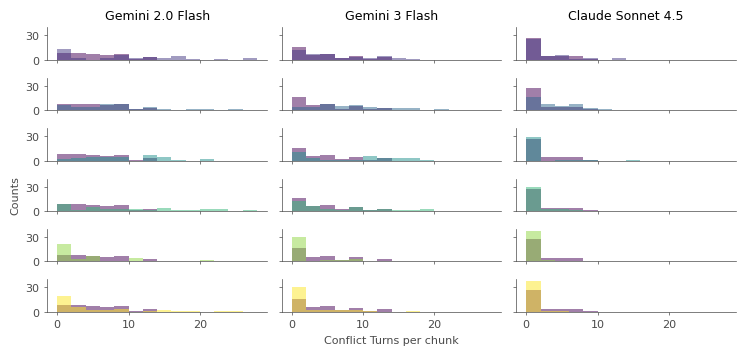

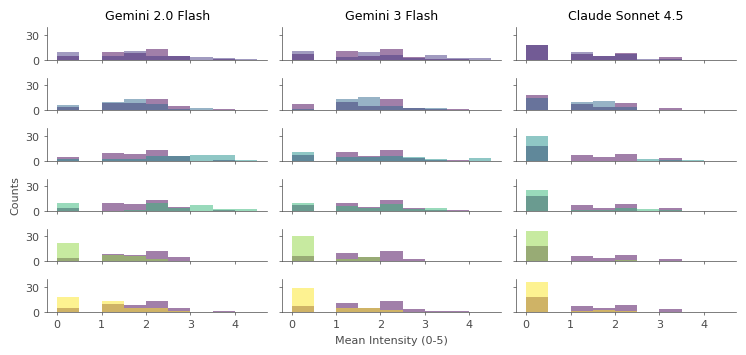

In [6]:
# === CONFLICT VISUALIZATION ===

fig, axes = pu.plot_model_comparison_histograms(
    conflict_turns_by_model,
    MODEL_LABELS,
    bins=15,
    xlabel='Conflict Turns per chunk'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_conflict_turns.pdf', transparent=True)

fig, axes = pu.plot_model_comparison_histograms(
    mean_intensity_by_model,
    MODEL_LABELS,
    bins=10,
    xlabel='Mean Intensity (0-5)'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_conflict_intensity.pdf', transparent=True)

In [7]:
# === HUMOR ANALYSIS ===

humor_results = {}
for model in MODELS:
    print(f"Running humor analysis with {model}...")
    humor_results[model] = metrics.analyze_humor(dfs, model=model, force_refresh=FORCE_REFRESH)

humor_turns_by_model = {}
mean_originality_by_model = {}
for i, model in enumerate(MODELS):
    label = MODEL_LABELS[i]
    humor_turns_by_model[label], _ = pu.aggregate_metric(
        humor_results[model], campaign_names, categories, CATEGORY_ORDER, 'humor_turns'
    )
    mean_originality_by_model[label], _ = pu.aggregate_metric(
        humor_results[model], campaign_names, categories, CATEGORY_ORDER, 'mean_originality'
    )

Running humor analysis with gemini/gemini-2.0-flash...
Analyzing humor in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:12<00:00,  6.15s/window]


  Classifying 89 turn(s)...
  Rating 58 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 58/58 [00:41<00:00,  1.41episode/s]


  Found 58 humor episode(s) in 11 chunk(s) (54 origin, 4 callback)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:10<00:00, 10.73s/window]


  Classifying 36 turn(s)...
  Rating 25 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 25/25 [00:17<00:00,  1.44episode/s]


  Found 25 humor episode(s) in 6 chunk(s) (24 origin, 1 callback)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:07<00:00,  7.09s/window]


  Classifying 22 turn(s)...
  Rating 16 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 16/16 [00:11<00:00,  1.34episode/s]


  Found 16 humor episode(s) in 5 chunk(s) (16 origin, 0 callback)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:05<00:00,  5.68s/window]


  Classifying 24 turn(s)...
  Rating 18 episode(s)...


  20049-age-of-death rating: 100%|██████████| 18/18 [00:12<00:00,  1.40episode/s]


  Found 18 humor episode(s) in 4 chunk(s) (14 origin, 4 callback)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.81s/window]


  Classifying 52 turn(s)...
  Rating 47 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 47/47 [00:35<00:00,  1.32episode/s]


  Found 47 humor episode(s) in 7 chunk(s) (43 origin, 4 callback)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:12<00:00, 12.01s/window]


  Classifying 33 turn(s)...
  Rating 29 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 29/29 [00:21<00:00,  1.37episode/s]


  Found 29 humor episode(s) in 5 chunk(s) (27 origin, 2 callback)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:04<00:00,  4.36s/window]


  Classifying 16 turn(s)...
  Rating 14 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 14/14 [00:10<00:00,  1.38episode/s]


  Found 14 humor episode(s) in 2 chunk(s) (13 origin, 1 callback)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.85s/window]


  Classifying 38 turn(s)...
  Rating 35 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 35/35 [00:28<00:00,  1.23episode/s]


  Found 35 humor episode(s) in 5 chunk(s) (7 origin, 28 callback)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.13s/window]


  Classifying 34 turn(s)...
  Rating 31 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 31/31 [00:24<00:00,  1.25episode/s]


  Found 31 humor episode(s) in 5 chunk(s) (8 origin, 23 callback)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.95s/window]


  Classifying 12 turn(s)...
  Rating 9 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 9/9 [00:06<00:00,  1.46episode/s]


  Found 9 humor episode(s) in 5 chunk(s) (3 origin, 6 callback)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.73s/window]


  Classifying 15 turn(s)...
  Rating 13 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 13/13 [00:09<00:00,  1.40episode/s]


  Found 13 humor episode(s) in 5 chunk(s) (12 origin, 1 callback)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.28s/window]


  Classifying 49 turn(s)...
  Rating 40 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating:   8%|▊         | 3/40 [00:02<00:31,  1.17episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 40/40 [00:41<00:00,  1.03s/episode]


  Found 40 humor episode(s) in 5 chunk(s) (39 origin, 1 callback)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.38s/window]


  Classifying 19 turn(s)...
  Rating 17 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 17/17 [00:13<00:00,  1.29episode/s]


  Found 17 humor episode(s) in 5 chunk(s) (4 origin, 13 callback)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.80s/window]


  Classifying 39 turn(s)...
  Rating 39 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 39/39 [00:32<00:00,  1.21episode/s]


  Found 39 humor episode(s) in 6 chunk(s) (34 origin, 5 callback)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.29s/window]


  Classifying 52 turn(s)...
  Rating 50 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 50/50 [00:39<00:00,  1.27episode/s]


  Found 50 humor episode(s) in 5 chunk(s) (19 origin, 31 callback)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:11<00:00,  5.61s/window]


  Classifying 56 turn(s)...
  Rating 49 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 49/49 [00:35<00:00,  1.37episode/s]


  Found 49 humor episode(s) in 11 chunk(s) (27 origin, 22 callback)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:20<00:00, 10.37s/window]


  Classifying 130 turn(s)...
  Rating 65 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 65/65 [00:48<00:00,  1.34episode/s]


  Found 65 humor episode(s) in 10 chunk(s) (24 origin, 41 callback)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:11<00:00,  5.90s/window]


  Classifying 56 turn(s)...
  Rating 25 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 25/25 [00:18<00:00,  1.37episode/s]


  Found 25 humor episode(s) in 10 chunk(s) (10 origin, 15 callback)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:14<00:00,  7.27s/window]


  Classifying 71 turn(s)...
  Rating 54 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 54/54 [00:40<00:00,  1.32episode/s]


  Found 54 humor episode(s) in 11 chunk(s) (8 origin, 46 callback)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.00s/window]


  Classifying 88 turn(s)...
  Rating 49 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating:  51%|█████     | 25/49 [00:19<00:19,  1.26episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 49/49 [00:47<00:00,  1.02episode/s]


  Found 49 humor episode(s) in 4 chunk(s) (31 origin, 18 callback)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.00s/window]


  Classifying 84 turn(s)...
  Rating 47 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 47/47 [00:34<00:00,  1.35episode/s]


  Found 47 humor episode(s) in 4 chunk(s) (33 origin, 14 callback)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.97s/window]


  Classifying 25 turn(s)...
  Rating 23 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 23/23 [00:15<00:00,  1.46episode/s]


  Found 23 humor episode(s) in 4 chunk(s) (8 origin, 15 callback)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.26s/window]


  Classifying 66 turn(s)...
  Rating 26 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 26/26 [00:18<00:00,  1.44episode/s]


  Found 26 humor episode(s) in 4 chunk(s) (5 origin, 21 callback)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.02s/window]


  Classifying 40 turn(s)...
  Rating 28 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 28/28 [00:19<00:00,  1.44episode/s]


  Found 28 humor episode(s) in 4 chunk(s) (26 origin, 2 callback)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.18s/window]


  Classifying 30 turn(s)...
  Rating 19 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 19/19 [00:14<00:00,  1.34episode/s]


  Found 19 humor episode(s) in 4 chunk(s) (18 origin, 1 callback)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.81s/window]


  Classifying 69 turn(s)...
  Rating 61 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 61/61 [00:46<00:00,  1.32episode/s]


  Found 61 humor episode(s) in 6 chunk(s) (61 origin, 0 callback)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.90s/window]


  Classifying 48 turn(s)...
  Rating 38 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 38/38 [00:28<00:00,  1.35episode/s]


  Found 38 humor episode(s) in 6 chunk(s) (23 origin, 15 callback)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.33s/window]


  Classifying 64 turn(s)...
  Rating 49 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 49/49 [00:35<00:00,  1.37episode/s]


  Found 49 humor episode(s) in 6 chunk(s) (34 origin, 15 callback)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.68s/window]


  Classifying 64 turn(s)...
  Rating 50 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 50/50 [00:35<00:00,  1.41episode/s]


  Found 50 humor episode(s) in 6 chunk(s) (21 origin, 29 callback)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.91s/window]


  Classifying 29 turn(s)...
  Rating 22 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 22/22 [00:15<00:00,  1.40episode/s]


  Found 22 humor episode(s) in 6 chunk(s) (8 origin, 14 callback)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.30s/window]


  Classifying 54 turn(s)...
  Rating 42 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 42/42 [00:30<00:00,  1.40episode/s]


  Found 42 humor episode(s) in 6 chunk(s) (17 origin, 25 callback)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.19s/window]


  Classifying 7 turn(s)...
  Rating 4 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 4/4 [00:02<00:00,  1.34episode/s]


  Found 4 humor episode(s) in 2 chunk(s) (3 origin, 1 callback)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.96s/window]


  Classifying 7 turn(s)...
  Rating 4 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 4/4 [00:02<00:00,  1.44episode/s]


  Found 4 humor episode(s) in 2 chunk(s) (4 origin, 0 callback)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.39s/window]


  Classifying 8 turn(s)...
  Rating 6 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 6/6 [00:04<00:00,  1.31episode/s]


  Found 6 humor episode(s) in 2 chunk(s) (5 origin, 1 callback)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.12s/window]


  Classifying 12 turn(s)...
  Rating 9 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 9/9 [00:07<00:00,  1.22episode/s]


  Found 9 humor episode(s) in 2 chunk(s) (8 origin, 1 callback)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.33s/window]


  Classifying 3 turn(s)...
  Rating 1 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 1/1 [00:00<00:00,  1.39episode/s]


  Found 1 humor episode(s) in 2 chunk(s) (0 origin, 1 callback)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.33s/window]


  Classifying 4 turn(s)...
  Rating 2 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 2/2 [00:01<00:00,  1.54episode/s]


  Found 2 humor episode(s) in 2 chunk(s) (2 origin, 0 callback)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.60s/window]


  Classifying 67 turn(s)...
  Rating 59 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 59/59 [00:49<00:00,  1.18episode/s]


  Found 59 humor episode(s) in 5 chunk(s) (54 origin, 5 callback)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.75s/window]


  Classifying 43 turn(s)...
  Rating 39 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 39/39 [00:31<00:00,  1.22episode/s]


  Found 39 humor episode(s) in 7 chunk(s) (29 origin, 10 callback)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.60s/window]


  Classifying 56 turn(s)...
  Rating 41 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 41/41 [00:32<00:00,  1.28episode/s]


  Found 41 humor episode(s) in 7 chunk(s) (18 origin, 23 callback)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.76s/window]


  Classifying 68 turn(s)...
  Rating 43 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 43/43 [00:33<00:00,  1.27episode/s]


  Found 43 humor episode(s) in 7 chunk(s) (24 origin, 19 callback)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.27s/window]


  Classifying 56 turn(s)...
  Rating 52 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 52/52 [00:41<00:00,  1.26episode/s]


  Found 52 humor episode(s) in 7 chunk(s) (19 origin, 33 callback)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.93s/window]


  Classifying 31 turn(s)...
  Rating 27 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 27/27 [00:21<00:00,  1.28episode/s]


  Found 27 humor episode(s) in 7 chunk(s) (22 origin, 5 callback)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.42s/window]


  Classifying 41 turn(s)...
  Rating 32 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 32/32 [00:22<00:00,  1.40episode/s]


  Found 32 humor episode(s) in 5 chunk(s) (31 origin, 1 callback)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.37s/window]


  Classifying 18 turn(s)...
  Rating 16 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 16/16 [00:12<00:00,  1.26episode/s]


  Found 16 humor episode(s) in 5 chunk(s) (15 origin, 1 callback)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.67s/window]


  Classifying 53 turn(s)...
  Rating 41 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 41/41 [00:29<00:00,  1.39episode/s]


  Found 41 humor episode(s) in 5 chunk(s) (35 origin, 6 callback)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.09s/window]


  Classifying 43 turn(s)...
  Rating 42 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 42/42 [00:30<00:00,  1.37episode/s]


  Found 42 humor episode(s) in 5 chunk(s) (4 origin, 38 callback)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.50s/window]


  Classifying 29 turn(s)...
  Rating 28 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 28/28 [00:18<00:00,  1.48episode/s]


  Found 28 humor episode(s) in 5 chunk(s) (17 origin, 11 callback)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.13s/window]


  Classifying 15 turn(s)...
  Rating 15 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 15/15 [00:10<00:00,  1.44episode/s]


  Found 15 humor episode(s) in 5 chunk(s) (15 origin, 0 callback)
💾 Saved 49 Humor results to cache
Running humor analysis with gemini/gemini-3-flash-preview...
Analyzing humor in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:21<00:00, 10.63s/window]


  Classifying 99 turn(s)...
  Rating 71 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 71/71 [01:15<00:00,  1.06s/episode]


  Found 71 humor episode(s) in 11 chunk(s) (58 origin, 13 callback)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:11<00:00, 11.75s/window]


  Classifying 53 turn(s)...
  Rating 38 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 38/38 [00:38<00:00,  1.02s/episode]


  Found 38 humor episode(s) in 6 chunk(s) (23 origin, 15 callback)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:11<00:00, 11.17s/window]


  Classifying 43 turn(s)...
  Rating 34 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 34/34 [00:35<00:00,  1.04s/episode]


  Found 34 humor episode(s) in 5 chunk(s) (18 origin, 16 callback)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:06<00:00,  6.47s/window]


  Classifying 34 turn(s)...
  Rating 22 episode(s)...


  20049-age-of-death rating: 100%|██████████| 22/22 [00:23<00:00,  1.07s/episode]


  Found 22 humor episode(s) in 4 chunk(s) (8 origin, 14 callback)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.24s/window]


  Classifying 69 turn(s)...
  Rating 52 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 52/52 [00:56<00:00,  1.08s/episode]


  Found 52 humor episode(s) in 7 chunk(s) (31 origin, 21 callback)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:13<00:00, 13.93s/window]


  Classifying 46 turn(s)...
  Rating 35 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 35/35 [00:37<00:00,  1.08s/episode]


  Found 35 humor episode(s) in 5 chunk(s) (26 origin, 9 callback)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:03<00:00,  3.25s/window]


  Classifying 11 turn(s)...
  Rating 8 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 8/8 [00:08<00:00,  1.10s/episode]


  Found 8 humor episode(s) in 2 chunk(s) (6 origin, 2 callback)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.57s/window]


  Classifying 26 turn(s)...
  Rating 26 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 26/26 [00:29<00:00,  1.13s/episode]


  Found 26 humor episode(s) in 5 chunk(s) (15 origin, 11 callback)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.75s/window]


  Classifying 20 turn(s)...
  Rating 18 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 18/18 [00:19<00:00,  1.10s/episode]


  Found 18 humor episode(s) in 5 chunk(s) (13 origin, 5 callback)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.38s/window]


  Classifying 7 turn(s)...
  Rating 5 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 5/5 [00:04<00:00,  1.06episode/s]


  Found 5 humor episode(s) in 5 chunk(s) (2 origin, 3 callback)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.71s/window]


  Classifying 24 turn(s)...
  Rating 23 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 23/23 [00:23<00:00,  1.03s/episode]


  Found 23 humor episode(s) in 5 chunk(s) (10 origin, 13 callback)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.40s/window]


  Found 0 humor episode(s) in 5 chunk(s) (0 origin, 0 callback)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.23s/window]


  Classifying 29 turn(s)...
  Rating 28 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 28/28 [00:31<00:00,  1.13s/episode]


  Found 28 humor episode(s) in 5 chunk(s) (2 origin, 26 callback)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.83s/window]


  Classifying 41 turn(s)...
  Rating 38 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 38/38 [00:44<00:00,  1.16s/episode]


  Found 38 humor episode(s) in 6 chunk(s) (27 origin, 11 callback)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.77s/window]


  Classifying 41 turn(s)...
  Rating 37 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 37/37 [00:40<00:00,  1.08s/episode]


  Found 37 humor episode(s) in 5 chunk(s) (18 origin, 19 callback)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:23<00:00, 11.91s/window]


  Classifying 98 turn(s)...
  Rating 67 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 67/67 [01:10<00:00,  1.05s/episode]


  Found 67 humor episode(s) in 10 chunk(s) (23 origin, 44 callback)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:27<00:00, 13.53s/window]


  Classifying 139 turn(s)...
  Rating 79 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 79/79 [05:43<00:00,  4.35s/episode]


  Found 79 humor episode(s) in 10 chunk(s) (28 origin, 51 callback)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:24<00:00, 12.07s/window]


  Classifying 46 turn(s)...
  Rating 46 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating:   7%|▋         | 3/46 [00:03<00:43,  1.01s/episode]

⚠️  API error (attempt 1/3): litellm.Timeout: Connection timed out after None seconds.
⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 46/46 [21:44<00:00, 28.35s/episode]  


  Found 46 humor episode(s) in 11 chunk(s) (24 origin, 22 callback)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:21<00:00, 11.00s/window]


  Classifying 59 turn(s)...
  Rating 50 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 50/50 [00:56<00:00,  1.14s/episode]


  Found 50 humor episode(s) in 11 chunk(s) (11 origin, 39 callback)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.12s/window]


  Classifying 71 turn(s)...
  Rating 43 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 43/43 [00:46<00:00,  1.09s/episode]


  Found 43 humor episode(s) in 4 chunk(s) (15 origin, 28 callback)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.40s/window]


  Classifying 67 turn(s)...
  Rating 36 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 36/36 [00:39<00:00,  1.11s/episode]


  Found 36 humor episode(s) in 4 chunk(s) (12 origin, 24 callback)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.85s/window]


  Classifying 64 turn(s)...
  Rating 44 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 44/44 [00:46<00:00,  1.05s/episode]


  Found 44 humor episode(s) in 4 chunk(s) (15 origin, 29 callback)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.36s/window]


  Classifying 77 turn(s)...
  Rating 31 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 31/31 [00:34<00:00,  1.10s/episode]


  Found 31 humor episode(s) in 4 chunk(s) (4 origin, 27 callback)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.93s/window]


  Classifying 70 turn(s)...
  Rating 45 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 45/45 [00:49<00:00,  1.10s/episode]


  Found 45 humor episode(s) in 4 chunk(s) (21 origin, 24 callback)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.92s/window]


  Classifying 72 turn(s)...
  Rating 47 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 47/47 [00:54<00:00,  1.17s/episode]


  Found 47 humor episode(s) in 4 chunk(s) (26 origin, 21 callback)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.87s/window]


  Classifying 37 turn(s)...
  Rating 34 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 34/34 [00:39<00:00,  1.16s/episode]


  Found 34 humor episode(s) in 6 chunk(s) (7 origin, 27 callback)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.15s/window]


  Classifying 64 turn(s)...
  Rating 46 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 46/46 [00:53<00:00,  1.17s/episode]


  Found 46 humor episode(s) in 6 chunk(s) (8 origin, 38 callback)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.04s/window]


  Classifying 76 turn(s)...
  Rating 47 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 47/47 [00:52<00:00,  1.12s/episode]


  Found 47 humor episode(s) in 6 chunk(s) (12 origin, 35 callback)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.12s/window]


  Classifying 58 turn(s)...
  Rating 51 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 51/51 [00:57<00:00,  1.13s/episode]


  Found 51 humor episode(s) in 6 chunk(s) (12 origin, 39 callback)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.80s/window]


  Classifying 72 turn(s)...
  Rating 53 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 53/53 [01:01<00:00,  1.16s/episode]


  Found 53 humor episode(s) in 6 chunk(s) (17 origin, 36 callback)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.66s/window]


  Classifying 60 turn(s)...
  Rating 44 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 44/44 [00:51<00:00,  1.17s/episode]


  Found 44 humor episode(s) in 6 chunk(s) (18 origin, 26 callback)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.77s/window]


  Classifying 9 turn(s)...
  Rating 6 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 6/6 [00:07<00:00,  1.21s/episode]


  Found 6 humor episode(s) in 2 chunk(s) (5 origin, 1 callback)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.76s/window]


  Classifying 7 turn(s)...
  Rating 4 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 4/4 [00:05<00:00,  1.25s/episode]


  Found 4 humor episode(s) in 2 chunk(s) (4 origin, 0 callback)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.51s/window]


  Classifying 13 turn(s)...
  Rating 8 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 8/8 [00:09<00:00,  1.18s/episode]


  Found 8 humor episode(s) in 2 chunk(s) (5 origin, 3 callback)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.99s/window]


  Classifying 13 turn(s)...
  Rating 9 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 9/9 [00:09<00:00,  1.10s/episode]


  Found 9 humor episode(s) in 2 chunk(s) (7 origin, 2 callback)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.11s/window]


  Found 0 humor episode(s) in 2 chunk(s) (0 origin, 0 callback)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.75s/window]


  Classifying 3 turn(s)...
  Rating 1 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 1/1 [00:00<00:00,  1.06episode/s]


  Found 1 humor episode(s) in 2 chunk(s) (1 origin, 0 callback)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.99s/window]


  Classifying 66 turn(s)...
  Rating 42 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 42/42 [00:49<00:00,  1.17s/episode]


  Found 42 humor episode(s) in 5 chunk(s) (15 origin, 27 callback)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.07s/window]


  Classifying 77 turn(s)...
  Rating 62 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 62/62 [01:13<00:00,  1.19s/episode]


  Found 62 humor episode(s) in 7 chunk(s) (31 origin, 31 callback)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.29s/window]


  Classifying 66 turn(s)...
  Rating 33 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 33/33 [00:36<00:00,  1.11s/episode]


  Found 33 humor episode(s) in 7 chunk(s) (7 origin, 26 callback)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.03s/window]


  Classifying 71 turn(s)...
  Rating 41 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 41/41 [00:45<00:00,  1.11s/episode]


  Found 41 humor episode(s) in 7 chunk(s) (13 origin, 28 callback)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.39s/window]


  Classifying 62 turn(s)...
  Rating 51 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 51/51 [01:00<00:00,  1.19s/episode]


  Found 51 humor episode(s) in 7 chunk(s) (12 origin, 39 callback)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.41s/window]


  Classifying 65 turn(s)...
  Rating 64 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 64/64 [01:13<00:00,  1.15s/episode]


  Found 64 humor episode(s) in 7 chunk(s) (16 origin, 48 callback)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.34s/window]


  Classifying 60 turn(s)...
  Rating 55 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 55/55 [01:02<00:00,  1.13s/episode]


  Found 55 humor episode(s) in 5 chunk(s) (5 origin, 50 callback)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.75s/window]


  Classifying 68 turn(s)...
  Rating 44 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 44/44 [00:52<00:00,  1.19s/episode]


  Found 44 humor episode(s) in 5 chunk(s) (4 origin, 40 callback)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.70s/window]


  Classifying 52 turn(s)...
  Rating 41 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 41/41 [00:45<00:00,  1.12s/episode]


  Found 41 humor episode(s) in 5 chunk(s) (17 origin, 24 callback)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.64s/window]


  Classifying 63 turn(s)...
  Rating 46 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 46/46 [00:53<00:00,  1.16s/episode]


  Found 46 humor episode(s) in 5 chunk(s) (16 origin, 30 callback)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.75s/window]


  Classifying 45 turn(s)...
  Rating 42 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 42/42 [00:49<00:00,  1.18s/episode]


  Found 42 humor episode(s) in 5 chunk(s) (19 origin, 23 callback)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.85s/window]


  Classifying 49 turn(s)...
  Rating 46 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 46/46 [00:52<00:00,  1.15s/episode]


  Found 46 humor episode(s) in 5 chunk(s) (23 origin, 23 callback)
💾 Saved 49 Humor results to cache
Running humor analysis with claude-sonnet-4-5...
Analyzing humor in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:54<00:00, 27.02s/window]


  Classifying 51 turn(s)...
  Rating 41 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 41/41 [01:41<00:00,  2.49s/episode]


  Found 41 humor episode(s) in 11 chunk(s) (36 origin, 5 callback)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:35<00:00, 35.78s/window]


  Classifying 41 turn(s)...
  Rating 33 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 33/33 [01:27<00:00,  2.65s/episode]


  Found 33 humor episode(s) in 6 chunk(s) (30 origin, 3 callback)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:21<00:00, 21.20s/window]


  Classifying 28 turn(s)...
  Rating 20 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 20/20 [00:56<00:00,  2.83s/episode]


  Found 20 humor episode(s) in 5 chunk(s) (17 origin, 3 callback)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:23<00:00, 23.59s/window]


  Classifying 37 turn(s)...
  Rating 23 episode(s)...


  20049-age-of-death rating: 100%|██████████| 23/23 [00:55<00:00,  2.42s/episode]


  Found 23 humor episode(s) in 4 chunk(s) (10 origin, 13 callback)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:55<00:00, 55.02s/window]


  Classifying 52 turn(s)...
  Rating 36 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 36/36 [01:42<00:00,  2.84s/episode]


  Found 36 humor episode(s) in 7 chunk(s) (26 origin, 10 callback)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:49<00:00, 49.47s/window]


  Classifying 39 turn(s)...
  Rating 35 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 35/35 [01:39<00:00,  2.85s/episode]


  Found 35 humor episode(s) in 5 chunk(s) (28 origin, 7 callback)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:14<00:00, 14.02s/window]


  Classifying 13 turn(s)...
  Rating 11 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 11/11 [00:28<00:00,  2.59s/episode]


  Found 11 humor episode(s) in 2 chunk(s) (9 origin, 2 callback)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.24s/window]


  Found 0 humor episode(s) in 5 chunk(s) (0 origin, 0 callback)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.04s/window]


  Found 0 humor episode(s) in 5 chunk(s) (0 origin, 0 callback)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.01s/window]


  Classifying 7 turn(s)...
  Rating 6 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 6/6 [00:16<00:00,  2.73s/episode]


  Found 6 humor episode(s) in 5 chunk(s) (4 origin, 2 callback)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.20s/window]


  Found 0 humor episode(s) in 5 chunk(s) (0 origin, 0 callback)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.97s/window]


  Found 0 humor episode(s) in 5 chunk(s) (0 origin, 0 callback)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.70s/window]


  Found 0 humor episode(s) in 5 chunk(s) (0 origin, 0 callback)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:37<00:00, 37.86s/window]


  Classifying 30 turn(s)...
  Rating 27 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 27/27 [01:25<00:00,  3.17s/episode]


  Found 27 humor episode(s) in 6 chunk(s) (10 origin, 17 callback)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:51<00:00, 51.28s/window]


  Classifying 45 turn(s)...
  Rating 40 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating:  65%|██████▌   | 26/40 [01:26<00:46,  3.31s/episode]


TypeError: expected string or bytes-like object, got 'NoneType'

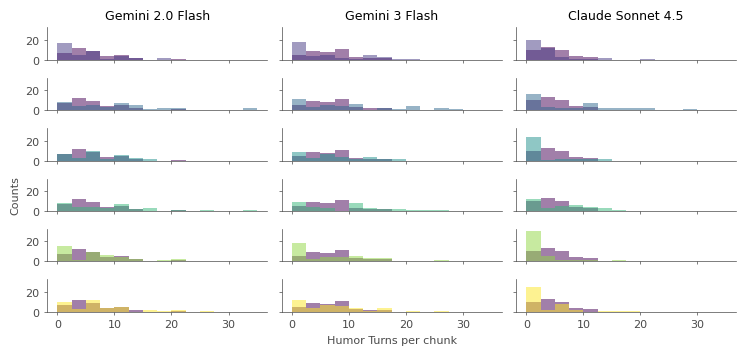

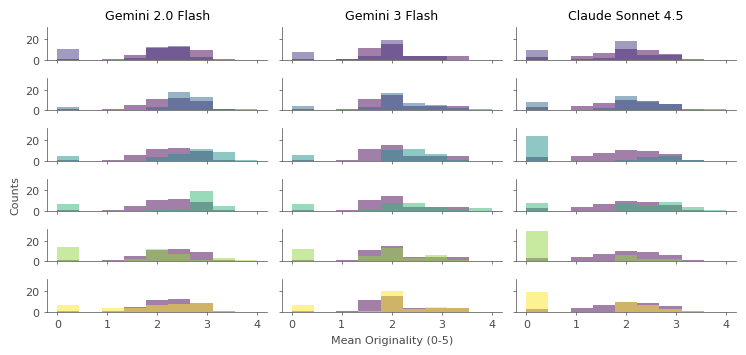

In [ ]:
# === HUMOR VISUALIZATION ===

fig, axes = pu.plot_model_comparison_histograms(
    humor_turns_by_model,
    MODEL_LABELS,
    bins=15,
    xlabel='Humor Turns per chunk'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_humor_turns.pdf', transparent=True)

fig, axes = pu.plot_model_comparison_histograms(
    mean_originality_by_model,
    MODEL_LABELS,
    bins=10,
    xlabel='Mean Originality (0-5)'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_humor_originality.pdf', transparent=True)

In [ ]:
# === COOPERATION ANALYSIS ===

cooperation_results = {}
for model in MODELS:
    print(f"Running cooperation analysis with {model}...")
    cooperation_results[model] = metrics.analyze_cooperation(dfs, model=model, force_refresh=FORCE_REFRESH)

cooperation_turns_by_model = {}
mean_depth_by_model = {}
for i, model in enumerate(MODELS):
    label = MODEL_LABELS[i]
    cooperation_turns_by_model[label], _ = pu.aggregate_metric(
        cooperation_results[model], campaign_names, categories, CATEGORY_ORDER, 'cooperation_turns'
    )
    mean_depth_by_model[label], _ = pu.aggregate_metric(
        cooperation_results[model], campaign_names, categories, CATEGORY_ORDER, 'mean_depth'
    )

Running cooperation analysis with gemini/gemini-2.0-flash...
Analyzing cooperation in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:07<00:00,  3.64s/window]


  Rating 25 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 25/25 [00:18<00:00,  1.34episode/s]


  Found 25 cooperation episode(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:06<00:00,  6.11s/window]


  Rating 21 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 21/21 [00:15<00:00,  1.36episode/s]


  Found 21 cooperation episode(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:14<00:00, 14.98s/window]


  Rating 34 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 34/34 [00:25<00:00,  1.32episode/s]


  Found 34 cooperation episode(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:03<00:00,  3.09s/window]


  Rating 11 episode(s)...


  20049-age-of-death rating: 100%|██████████| 11/11 [00:07<00:00,  1.43episode/s]


  Found 11 cooperation episode(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.91s/window]


  Rating 36 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 36/36 [00:27<00:00,  1.30episode/s]


  Found 36 cooperation episode(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:15<00:00, 15.39s/window]


  Rating 49 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 49/49 [00:35<00:00,  1.40episode/s]


  Found 49 cooperation episode(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:03<00:00,  3.48s/window]


  Rating 7 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 7/7 [00:04<00:00,  1.43episode/s]


  Found 7 cooperation episode(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.64s/window]


  Rating 29 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 29/29 [00:23<00:00,  1.26episode/s]


  Found 29 cooperation episode(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.44s/window]


  Rating 27 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 27/27 [00:20<00:00,  1.32episode/s]


  Found 27 cooperation episode(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.11s/window]


  Rating 40 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 40/40 [00:27<00:00,  1.46episode/s]


  Found 40 cooperation episode(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.65s/window]


  Rating 44 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 44/44 [00:30<00:00,  1.44episode/s]


  Found 44 cooperation episode(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.77s/window]


  Rating 44 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 44/44 [00:32<00:00,  1.35episode/s]


  Found 44 cooperation episode(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.57s/window]


  Rating 27 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 27/27 [00:19<00:00,  1.36episode/s]


  Found 27 cooperation episode(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.34s/window]


  Rating 55 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 55/55 [00:38<00:00,  1.44episode/s]


  Found 55 cooperation episode(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.49s/window]


  Rating 56 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 56/56 [00:39<00:00,  1.43episode/s]


  Found 56 cooperation episode(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:14<00:00,  7.19s/window]


  Rating 74 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 74/74 [00:50<00:00,  1.47episode/s]


  Found 74 cooperation episode(s) in 10 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:15<00:00,  7.54s/window]


  Rating 93 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 93/93 [01:01<00:00,  1.52episode/s]


  Found 93 cooperation episode(s) in 10 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:19<00:00,  9.62s/window]


  Rating 84 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 84/84 [00:56<00:00,  1.50episode/s]


  Found 84 cooperation episode(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:20<00:00, 10.47s/window]


  Rating 81 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 81/81 [00:57<00:00,  1.40episode/s]


  Found 81 cooperation episode(s) in 10 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.84s/window]


  Rating 14 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 14/14 [00:09<00:00,  1.41episode/s]


  Found 14 cooperation episode(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.70s/window]


  Rating 23 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 23/23 [00:16<00:00,  1.36episode/s]


  Found 23 cooperation episode(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.69s/window]


  Rating 13 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 13/13 [00:08<00:00,  1.51episode/s]


  Found 13 cooperation episode(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.57s/window]


  Rating 17 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 17/17 [00:11<00:00,  1.50episode/s]


  Found 17 cooperation episode(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.44s/window]


  Rating 26 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 26/26 [00:17<00:00,  1.51episode/s]


  Found 26 cooperation episode(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.96s/window]


  Rating 26 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 26/26 [00:18<00:00,  1.44episode/s]


  Found 26 cooperation episode(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.15s/window]


  Rating 39 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 39/39 [00:25<00:00,  1.51episode/s]


  Found 39 cooperation episode(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.23s/window]


  Rating 9 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 9/9 [00:06<00:00,  1.46episode/s]


  Found 9 cooperation episode(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.33s/window]


  Rating 29 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 29/29 [00:19<00:00,  1.48episode/s]


  Found 29 cooperation episode(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.15s/window]


  Rating 59 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 59/59 [00:38<00:00,  1.52episode/s]


  Found 59 cooperation episode(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.33s/window]


  Rating 71 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 71/71 [00:49<00:00,  1.42episode/s]


  Found 71 cooperation episode(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.23s/window]


  Rating 28 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 28/28 [00:19<00:00,  1.46episode/s]


  Found 28 cooperation episode(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.74s/window]


  Rating 14 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 14/14 [00:10<00:00,  1.39episode/s]


  Found 14 cooperation episode(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.60s/window]


  Rating 11 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 11/11 [00:07<00:00,  1.51episode/s]


  Found 11 cooperation episode(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.69s/window]


  Rating 12 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 12/12 [00:07<00:00,  1.54episode/s]


  Found 12 cooperation episode(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.07s/window]


  Rating 9 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 9/9 [00:06<00:00,  1.46episode/s]


  Found 9 cooperation episode(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.72s/window]


  Rating 21 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 21/21 [00:14<00:00,  1.40episode/s]


  Found 21 cooperation episode(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.95s/window]


  Rating 22 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 22/22 [00:15<00:00,  1.40episode/s]


  Found 22 cooperation episode(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.42s/window]


  Rating 27 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 27/27 [00:19<00:00,  1.40episode/s]


  Found 27 cooperation episode(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.19s/window]


  Rating 36 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 36/36 [00:26<00:00,  1.36episode/s]


  Found 36 cooperation episode(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.31s/window]


  Rating 13 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 13/13 [00:08<00:00,  1.52episode/s]


  Found 13 cooperation episode(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.27s/window]


  Rating 34 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 34/34 [00:22<00:00,  1.53episode/s]


  Found 34 cooperation episode(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.83s/window]


  Rating 23 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 23/23 [00:16<00:00,  1.41episode/s]


  Found 23 cooperation episode(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.84s/window]


  Rating 44 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 44/44 [00:30<00:00,  1.43episode/s]


  Found 44 cooperation episode(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.66s/window]


  Rating 43 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 43/43 [00:29<00:00,  1.43episode/s]


  Found 43 cooperation episode(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.19s/window]


  Rating 27 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 27/27 [00:19<00:00,  1.38episode/s]


  Found 27 cooperation episode(s) in 4 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.58s/window]


  Rating 59 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 59/59 [00:40<00:00,  1.44episode/s]


  Found 59 cooperation episode(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.93s/window]


  Rating 22 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 22/22 [00:15<00:00,  1.41episode/s]


  Found 22 cooperation episode(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.23s/window]


  Rating 26 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 26/26 [00:19<00:00,  1.36episode/s]


  Found 26 cooperation episode(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.57s/window]


  Rating 31 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 31/31 [00:23<00:00,  1.31episode/s]


  Found 31 cooperation episode(s) in 5 chunk(s)
💾 Saved 49 Cooperation results to cache
Running cooperation analysis with gemini/gemini-3-flash-preview...
Analyzing cooperation in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:15<00:00,  7.69s/window]


  Rating 50 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 50/50 [00:55<00:00,  1.10s/episode]


  Found 50 cooperation episode(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:04<00:00,  4.49s/window]


  Rating 19 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 19/19 [00:21<00:00,  1.12s/episode]


  Found 19 cooperation episode(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:05<00:00,  5.35s/window]


  Rating 19 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 19/19 [00:20<00:00,  1.09s/episode]


  Found 19 cooperation episode(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:04<00:00,  4.43s/window]


  Rating 18 episode(s)...


  20049-age-of-death rating: 100%|██████████| 18/18 [00:19<00:00,  1.11s/episode]


  Found 18 cooperation episode(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.30s/window]


  Rating 58 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 58/58 [01:03<00:00,  1.10s/episode]


  Found 58 cooperation episode(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:08<00:00,  8.63s/window]


  Rating 37 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 37/37 [00:41<00:00,  1.12s/episode]


  Found 37 cooperation episode(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:04<00:00,  4.29s/window]


  Rating 8 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 8/8 [00:09<00:00,  1.17s/episode]


  Found 8 cooperation episode(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.86s/window]


  Rating 42 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 42/42 [00:49<00:00,  1.17s/episode]


  Found 42 cooperation episode(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.33s/window]


  Rating 34 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 34/34 [00:39<00:00,  1.16s/episode]


  Found 34 cooperation episode(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.99s/window]


  Rating 32 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 32/32 [00:36<00:00,  1.15s/episode]


  Found 32 cooperation episode(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.88s/window]


  Rating 44 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 44/44 [00:48<00:00,  1.11s/episode]


  Found 44 cooperation episode(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.55s/window]


  Rating 44 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 44/44 [00:48<00:00,  1.10s/episode]


  Found 44 cooperation episode(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.03s/window]


  Rating 20 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 20/20 [00:22<00:00,  1.12s/episode]


  Found 20 cooperation episode(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.41s/window]


  Rating 43 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 43/43 [00:47<00:00,  1.11s/episode]


  Found 43 cooperation episode(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.48s/window]


  Rating 44 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 44/44 [00:48<00:00,  1.09s/episode]


  Found 44 cooperation episode(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:20<00:00, 10.35s/window]


  Rating 82 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 82/82 [01:30<00:00,  1.11s/episode]


  Found 82 cooperation episode(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:22<00:00, 11.26s/window]


  Rating 95 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 95/95 [01:40<00:00,  1.06s/episode]


  Found 95 cooperation episode(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:24<00:00, 12.32s/window]


  Rating 77 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 77/77 [01:28<00:00,  1.15s/episode]


  Found 77 cooperation episode(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:27<00:00, 13.52s/window]


  Rating 96 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 96/96 [01:56<00:00,  1.21s/episode]


  Found 96 cooperation episode(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.03s/window]


  Rating 37 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 37/37 [00:42<00:00,  1.15s/episode]


  Found 37 cooperation episode(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.67s/window]


  Rating 21 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 21/21 [00:22<00:00,  1.07s/episode]


  Found 21 cooperation episode(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.99s/window]


  Rating 14 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 14/14 [00:14<00:00,  1.06s/episode]


  Found 14 cooperation episode(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.54s/window]


  Rating 13 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 13/13 [00:14<00:00,  1.09s/episode]


  Found 13 cooperation episode(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.91s/window]


  Rating 21 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 21/21 [00:40<00:00,  1.91s/episode]


  Found 21 cooperation episode(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.28s/window]


  Rating 28 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 28/28 [00:43<00:00,  1.56s/episode]


  Found 28 cooperation episode(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.43s/window]


  Rating 35 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 35/35 [00:40<00:00,  1.15s/episode]


  Found 35 cooperation episode(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.37s/window]


  Rating 45 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 45/45 [00:53<00:00,  1.19s/episode]


  Found 45 cooperation episode(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.65s/window]


  Rating 29 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 29/29 [00:31<00:00,  1.09s/episode]


  Found 29 cooperation episode(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.11s/window]


  Rating 45 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 45/45 [00:48<00:00,  1.08s/episode]


  Found 45 cooperation episode(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.25s/window]


  Rating 42 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 42/42 [00:46<00:00,  1.11s/episode]


  Found 42 cooperation episode(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.60s/window]


  Rating 33 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 33/33 [00:38<00:00,  1.17s/episode]


  Found 33 cooperation episode(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.84s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 15/15 [00:18<00:00,  1.21s/episode]


  Found 15 cooperation episode(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.04s/window]


  Rating 12 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 12/12 [00:13<00:00,  1.11s/episode]


  Found 12 cooperation episode(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.09s/window]


  Rating 16 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 16/16 [00:18<00:00,  1.13s/episode]


  Found 16 cooperation episode(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.22s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 15/15 [00:16<00:00,  1.08s/episode]


  Found 15 cooperation episode(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.27s/window]


  Rating 20 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 20/20 [00:22<00:00,  1.12s/episode]


  Found 20 cooperation episode(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.42s/window]


  Rating 24 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 24/24 [00:27<00:00,  1.13s/episode]


  Found 24 cooperation episode(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.14s/window]


  Rating 32 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 32/32 [00:35<00:00,  1.10s/episode]


  Found 32 cooperation episode(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.28s/window]


  Rating 31 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 31/31 [00:36<00:00,  1.16s/episode]


  Found 31 cooperation episode(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.53s/window]


  Rating 11 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 11/11 [00:12<00:00,  1.12s/episode]


  Found 11 cooperation episode(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.80s/window]


  Rating 41 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 41/41 [00:44<00:00,  1.08s/episode]


  Found 41 cooperation episode(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.63s/window]


  Rating 31 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 31/31 [00:34<00:00,  1.12s/episode]


  Found 31 cooperation episode(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.66s/window]


  Rating 30 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 30/30 [00:36<00:00,  1.22s/episode]


  Found 30 cooperation episode(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.89s/window]


  Rating 38 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 38/38 [00:42<00:00,  1.13s/episode]


  Found 38 cooperation episode(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.93s/window]


  Rating 42 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 42/42 [00:46<00:00,  1.11s/episode]


  Found 42 cooperation episode(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.95s/window]


  Rating 46 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 46/46 [00:46<00:00,  1.02s/episode]


  Found 46 cooperation episode(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.36s/window]


  Rating 28 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 28/28 [00:30<00:00,  1.11s/episode]


  Found 28 cooperation episode(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.56s/window]


  Rating 46 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 46/46 [00:54<00:00,  1.18s/episode]


  Found 46 cooperation episode(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.16s/window]


  Rating 37 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 37/37 [00:41<00:00,  1.11s/episode]


  Found 37 cooperation episode(s) in 5 chunk(s)
💾 Saved 49 Cooperation results to cache
Running cooperation analysis with claude-sonnet-4-5...
Analyzing cooperation in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:36<00:00, 18.42s/window]


  Rating 26 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 26/26 [01:14<00:00,  2.86s/episode]


  Found 26 cooperation episode(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:14<00:00, 14.98s/window]


  Rating 12 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 12/12 [00:32<00:00,  2.72s/episode]


  Found 12 cooperation episode(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:13<00:00, 13.31s/window]


  Rating 13 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 13/13 [00:35<00:00,  2.72s/episode]


  Found 13 cooperation episode(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:08<00:00,  8.97s/window]


  Rating 8 episode(s)...


  20049-age-of-death rating: 100%|██████████| 8/8 [00:21<00:00,  2.74s/episode]


  Found 8 cooperation episode(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:29<00:00, 29.81s/window]


  Rating 34 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 34/34 [01:35<00:00,  2.82s/episode]


  Found 34 cooperation episode(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:19<00:00, 19.31s/window]


  Rating 24 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 24/24 [01:03<00:00,  2.64s/episode]


  Found 24 cooperation episode(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:10<00:00, 10.38s/window]


  Rating 8 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 8/8 [00:21<00:00,  2.64s/episode]


  Found 8 cooperation episode(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:53<00:00, 53.26s/window]


  Rating 28 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 28/28 [01:20<00:00,  2.87s/episode]


  Found 28 cooperation episode(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:28<00:00, 28.17s/window]


  Rating 29 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 29/29 [01:22<00:00,  2.86s/episode]


  Found 29 cooperation episode(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:26<00:00, 26.99s/window]


  Rating 33 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 33/33 [01:31<00:00,  2.77s/episode]


  Found 33 cooperation episode(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:40<00:00, 40.12s/window]


  Rating 42 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 42/42 [02:27<00:00,  3.51s/episode]


  Found 42 cooperation episode(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:18<00:00, 18.59s/window]


  Rating 13 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 13/13 [00:35<00:00,  2.75s/episode]


  Found 13 cooperation episode(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:42<00:00, 42.01s/window]


  Found 0 cooperation episode(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:54<00:00, 54.73s/window]


  Rating 51 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 51/51 [02:22<00:00,  2.79s/episode]


  Found 51 cooperation episode(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:54<00:00, 54.17s/window]


  Rating 49 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 49/49 [02:23<00:00,  2.92s/episode]


  Found 49 cooperation episode(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [01:06<00:00, 33.23s/window]


  Rating 78 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 78/78 [03:18<00:00,  2.55s/episode]


  Found 78 cooperation episode(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [01:17<00:00, 38.58s/window]


  Rating 76 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 76/76 [03:30<00:00,  2.76s/episode]


  Found 76 cooperation episode(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [01:12<00:00, 36.36s/window]


  Rating 79 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 79/79 [03:47<00:00,  2.88s/episode]


  Found 79 cooperation episode(s) in 10 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [01:19<00:00, 39.77s/window]


  Rating 87 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 87/87 [04:03<00:00,  2.80s/episode]


  Found 87 cooperation episode(s) in 10 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:18<00:00, 18.22s/window]


  Rating 18 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 18/18 [00:48<00:00,  2.71s/episode]


  Found 18 cooperation episode(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.29s/window]


  Rating 27 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 27/27 [01:14<00:00,  2.75s/episode]


  Found 27 cooperation episode(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.46s/window]


  Rating 15 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 15/15 [00:38<00:00,  2.59s/episode]


  Found 15 cooperation episode(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.57s/window]


  Rating 13 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 13/13 [00:34<00:00,  2.64s/episode]


  Found 13 cooperation episode(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.65s/window]


  Rating 15 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 15/15 [00:44<00:00,  2.95s/episode]


  Found 15 cooperation episode(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.96s/window]


  Rating 20 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 20/20 [00:53<00:00,  2.66s/episode]


  Found 20 cooperation episode(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:27<00:00, 27.11s/window]


  Rating 23 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 23/23 [01:05<00:00,  2.83s/episode]


  Found 23 cooperation episode(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:30<00:00, 30.74s/window]


  Rating 34 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 34/34 [01:39<00:00,  2.93s/episode]


  Found 34 cooperation episode(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:20<00:00, 20.42s/window]


  Rating 27 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 27/27 [01:12<00:00,  2.69s/episode]


  Found 27 cooperation episode(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.75s/window]


  Rating 28 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 28/28 [01:21<00:00,  2.90s/episode]


  Found 28 cooperation episode(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:46<00:00, 46.59s/window]


  Rating 58 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 58/58 [02:39<00:00,  2.75s/episode]


  Found 58 cooperation episode(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:27<00:00, 27.98s/window]


  Rating 26 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 26/26 [01:14<00:00,  2.86s/episode]


  Found 26 cooperation episode(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:20<00:00, 20.14s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 15/15 [00:44<00:00,  2.95s/episode]


  Found 15 cooperation episode(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.44s/window]


  Rating 12 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 12/12 [00:32<00:00,  2.71s/episode]


  Found 12 cooperation episode(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.48s/window]


  Rating 19 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 19/19 [00:50<00:00,  2.68s/episode]


  Found 19 cooperation episode(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.42s/window]


  Rating 17 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 17/17 [00:45<00:00,  2.67s/episode]


  Found 17 cooperation episode(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:18<00:00, 18.67s/window]


  Rating 19 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 19/19 [00:54<00:00,  2.89s/episode]


  Found 19 cooperation episode(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:24<00:00, 24.15s/window]


  Rating 25 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 25/25 [01:06<00:00,  2.65s/episode]


  Found 25 cooperation episode(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:49<00:00, 49.32s/window]


  Rating 28 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 28/28 [01:22<00:00,  2.93s/episode]


  Found 28 cooperation episode(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:53<00:00, 53.26s/window]


  Rating 29 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 29/29 [01:30<00:00,  3.12s/episode]


  Found 29 cooperation episode(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.83s/window]


  Rating 8 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 8/8 [00:22<00:00,  2.83s/episode]


  Found 8 cooperation episode(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:24<00:00, 24.37s/window]


  Rating 30 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 30/30 [01:19<00:00,  2.64s/episode]


  Found 30 cooperation episode(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:55<00:00, 55.29s/window]


  Rating 43 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 43/43 [01:59<00:00,  2.77s/episode]


  Found 43 cooperation episode(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:50<00:00, 50.12s/window]


  Rating 37 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 37/37 [01:47<00:00,  2.91s/episode]


  Found 37 cooperation episode(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:48<00:00, 48.65s/window]


  Rating 41 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 41/41 [01:57<00:00,  2.86s/episode]


  Found 41 cooperation episode(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:41<00:00, 41.25s/window]


  Rating 40 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 40/40 [02:02<00:00,  3.05s/episode]


  Found 40 cooperation episode(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:30<00:00, 30.81s/window]


  Rating 44 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 44/44 [02:01<00:00,  2.77s/episode]


  Found 44 cooperation episode(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.08s/window]


  Rating 23 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 23/23 [01:04<00:00,  2.78s/episode]


  Found 23 cooperation episode(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.20s/window]


  Rating 1 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 1/1 [00:03<00:00,  3.80s/episode]


  Found 1 cooperation episode(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:43<00:00, 43.06s/window]


  Rating 43 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 43/43 [02:08<00:00,  3.00s/episode]

  Found 43 cooperation episode(s) in 5 chunk(s)
💾 Saved 49 Cooperation results to cache


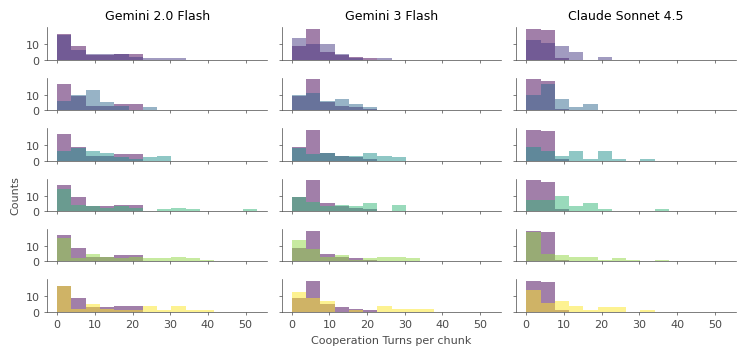

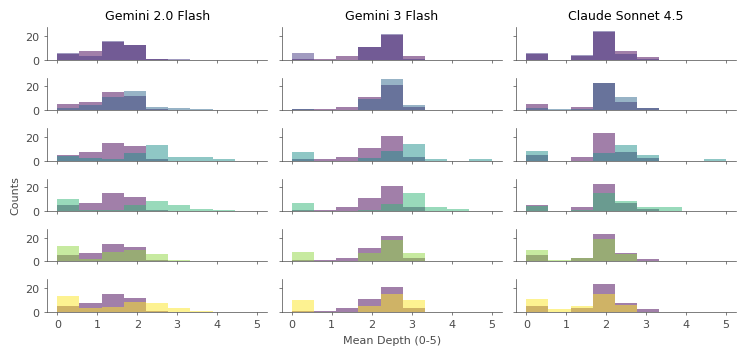

In [ ]:
# === COOPERATION VISUALIZATION ===

fig, axes = pu.plot_model_comparison_histograms(
    cooperation_turns_by_model,
    MODEL_LABELS,
    bins=15,
    xlabel='Cooperation Turns per chunk'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_cooperation_turns.pdf', transparent=True)

fig, axes = pu.plot_model_comparison_histograms(
    mean_depth_by_model,
    MODEL_LABELS,
    bins=10,
    xlabel='Mean Depth (0-5)'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_cooperation_depth.pdf', transparent=True)

In [8]:
# === NORMS ANALYSIS ===

norms_results = {}
for model in MODELS:
    print(f"Running norms analysis with {model}...")
    norms_results[model] = metrics.analyze_norms(dfs, model=model, force_refresh=FORCE_REFRESH)

norm_proportion_by_model = {}
total_violated_by_model = {}
for i, model in enumerate(MODELS):
    label = MODEL_LABELS[i]
    norm_proportion_by_model[label], _ = pu.aggregate_metric(
        norms_results[model], campaign_names, categories, CATEGORY_ORDER, 'norm_turns'
    )
    total_violated_by_model[label], _ = pu.aggregate_metric(
        norms_results[model], campaign_names, categories, CATEGORY_ORDER, 'total_violated'
    )

Running norms analysis with gemini/gemini-2.0-flash...
Analyzing norms in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:03<00:00,  1.81s/window]


  Categorizing 12 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg categorizing:  17%|█▋        | 2/12 [00:02<00:11,  1.11s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg categorizing: 100%|██████████| 12/12 [00:38<00:00,  3.17s/episode]


  Found 12 norm episode(s) across 12 unique norm(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:13<00:00, 13.96s/window]


  Categorizing 48 episode(s)...


  3135-the-head-of-the-serpent categorizing:  23%|██▎       | 11/48 [00:10<00:33,  1.10episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent categorizing:  69%|██████▉   | 33/48 [00:39<00:15,  1.04s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  3135-the-head-of-the-serpent categorizing: 100%|██████████| 48/48 [01:19<00:00,  1.65s/episode]


  Found 48 norm episode(s) across 11 unique norm(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:03<00:00,  3.96s/window]


  Categorizing 7 episode(s)...


  10391-guardians-of-gridori categorizing:  71%|███████▏  | 5/7 [00:06<00:02,  1.35s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori categorizing: 100%|██████████| 7/7 [00:34<00:00,  4.97s/episode]


  Found 7 norm episode(s) across 7 unique norm(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:02<00:00,  2.78s/window]


  Categorizing 6 episode(s)...


  20049-age-of-death categorizing: 100%|██████████| 6/6 [00:05<00:00,  1.05episode/s]


  Found 6 norm episode(s) across 6 unique norm(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.59s/window]


  Categorizing 5 episode(s)...


  89221-banhaven-academy-year-1 categorizing: 100%|██████████| 5/5 [00:05<00:00,  1.02s/episode]


  Found 5 norm episode(s) across 5 unique norm(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:06<00:00,  6.73s/window]


  Categorizing 19 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak categorizing: 100%|██████████| 19/19 [00:18<00:00,  1.03episode/s]


  Found 19 norm episode(s) across 18 unique norm(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:00<00:00,  1.82window/s]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.74s/window]


  Categorizing 23 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 categorizing:  17%|█▋        | 4/23 [00:04<00:19,  1.03s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 categorizing:  74%|███████▍  | 17/23 [00:44<00:07,  1.25s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 categorizing: 100%|██████████| 23/23 [01:01<00:00,  2.68s/episode]


  Found 23 norm episode(s) across 17 unique norm(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.82s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.04s/window]


  Categorizing 4 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 categorizing: 100%|██████████| 4/4 [00:03<00:00,  1.01episode/s]


  Found 4 norm episode(s) across 4 unique norm(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.87s/window]


  Categorizing 18 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 categorizing:  28%|██▊       | 5/18 [00:05<00:13,  1.05s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 categorizing:  78%|███████▊  | 14/18 [00:25<00:04,  1.21s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 categorizing: 100%|██████████| 18/18 [00:54<00:00,  3.04s/episode]


  Found 18 norm episode(s) across 11 unique norm(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.32s/window]


  Categorizing 32 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 categorizing:  44%|████▍     | 14/32 [00:15<00:20,  1.11s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 categorizing:  69%|██████▉   | 22/32 [00:35<00:13,  1.32s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 categorizing:  81%|████████▏ | 26/32 [01:05<00:23,  3.85s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 categorizing: 100%|██████████| 32/32 [01:23<00:00,  2.59s/episode]


  Found 32 norm episode(s) across 20 unique norm(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.16s/window]


  Categorizing 32 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 categorizing:  16%|█▌        | 5/32 [00:04<00:26,  1.01episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 categorizing:  28%|██▊       | 9/32 [00:34<01:27,  3.82s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 categorizing:  41%|████      | 13/32 [01:04<01:23,  4.37s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 categorizing:  88%|████████▊ | 28/32 [01:45<00:03,  1.06episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 categorizing: 100%|██████████| 32/32 [02:00<00:00,  3.76s/episode]


  Found 32 norm episode(s) across 4 unique norm(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.83s/window]


  Categorizing 39 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing:  15%|█▌        | 6/39 [00:05<00:31,  1.05episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing:  28%|██▊       | 11/39 [00:36<01:20,  2.88s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing:  38%|███▊      | 15/39 [01:05<01:36,  4.00s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing:  51%|█████▏    | 20/39 [01:36<01:04,  3.38s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing:  90%|████████▉ | 35/39 [02:17<00:04,  1.17s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing: 100%|██████████| 39/39 [02:32<00:00,  3.90s/episode]


  Found 39 norm episode(s) across 22 unique norm(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.33s/window]


  Categorizing 30 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 categorizing:  20%|██        | 6/30 [00:06<00:28,  1.17s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 categorizing:  33%|███▎      | 10/30 [00:36<01:15,  3.78s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 categorizing:  83%|████████▎ | 25/30 [01:06<00:06,  1.33s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 categorizing: 100%|██████████| 30/30 [01:37<00:00,  3.25s/episode]


  Found 30 norm episode(s) across 20 unique norm(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:10<00:00,  5.30s/window]


  Categorizing 12 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 categorizing: 100%|██████████| 12/12 [00:12<00:00,  1.06s/episode]


  Found 12 norm episode(s) across 10 unique norm(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:09<00:00,  4.71s/window]


  Categorizing 30 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing:  17%|█▋        | 5/30 [00:04<00:21,  1.17episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing:  20%|██        | 6/30 [00:15<01:46,  4.44s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing:  50%|█████     | 15/30 [00:36<00:19,  1.33s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing:  67%|██████▋   | 20/30 [01:06<00:27,  2.77s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing:  80%|████████  | 24/30 [01:36<00:25,  4.22s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing: 100%|██████████| 30/30 [02:09<00:00,  4.31s/episode]


  Found 30 norm episode(s) across 24 unique norm(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:21<00:00, 10.52s/window]


  Categorizing 84 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 categorizing:  38%|███▊      | 32/84 [00:35<00:54,  1.04s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 categorizing:  57%|█████▋    | 48/84 [01:05<00:43,  1.20s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 categorizing:  62%|██████▏   | 52/84 [01:36<02:01,  3.79s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 categorizing: 100%|██████████| 84/84 [02:18<00:00,  1.65s/episode]


  Found 84 norm episode(s) across 43 unique norm(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:21<00:00, 10.74s/window]


  Categorizing 92 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 categorizing:   5%|▌         | 5/92 [00:05<01:27,  1.00s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 categorizing:  77%|███████▋  | 71/92 [01:46<00:23,  1.14s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 categorizing:  89%|████████▉ | 82/92 [02:24<00:14,  1.44s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 categorizing: 100%|██████████| 92/92 [02:45<00:00,  1.80s/episode]


  Found 92 norm episode(s) across 62 unique norm(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.80s/window]


  Categorizing 6 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 categorizing: 100%|██████████| 6/6 [00:05<00:00,  1.09episode/s]


  Found 6 norm episode(s) across 6 unique norm(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.97s/window]


  Categorizing 4 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 categorizing: 100%|██████████| 4/4 [00:05<00:00,  1.28s/episode]


  Found 4 norm episode(s) across 4 unique norm(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.80s/window]


  Categorizing 4 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 categorizing: 100%|██████████| 4/4 [00:03<00:00,  1.17episode/s]


  Found 4 norm episode(s) across 3 unique norm(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.89s/window]


  Categorizing 39 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 categorizing:   3%|▎         | 1/39 [00:00<00:33,  1.15episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 categorizing:  13%|█▎        | 5/39 [00:30<02:22,  4.18s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 categorizing:  72%|███████▏  | 28/39 [01:21<00:12,  1.12s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 categorizing:  92%|█████████▏| 36/39 [01:41<00:04,  1.34s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 categorizing: 100%|██████████| 39/39 [01:55<00:00,  2.95s/episode]


  Found 39 norm episode(s) across 9 unique norm(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.32s/window]


  Categorizing 13 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 categorizing:  15%|█▌        | 2/13 [00:01<00:10,  1.07episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 categorizing:  92%|█████████▏| 12/13 [00:23<00:01,  1.31s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 categorizing: 100%|██████████| 13/13 [00:35<00:00,  2.69s/episode]


  Found 13 norm episode(s) across 11 unique norm(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.24s/window]


  Categorizing 12 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 categorizing:  33%|███▎      | 4/12 [00:04<00:09,  1.14s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 categorizing:  42%|████▏     | 5/12 [00:16<00:34,  4.90s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 categorizing: 100%|██████████| 12/12 [00:34<00:00,  2.84s/episode]


  Found 12 norm episode(s) across 4 unique norm(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.70s/window]


  Categorizing 25 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 categorizing:  28%|██▊       | 7/25 [00:07<00:19,  1.09s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 categorizing:  60%|██████    | 15/25 [00:26<00:13,  1.38s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 categorizing: 100%|██████████| 25/25 [00:47<00:00,  1.89s/episode]


  Found 25 norm episode(s) across 13 unique norm(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.78s/window]


  Categorizing 20 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 categorizing:  70%|███████   | 14/20 [00:16<00:06,  1.12s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 categorizing: 100%|██████████| 20/20 [00:33<00:00,  1.68s/episode]


  Found 20 norm episode(s) across 18 unique norm(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.58s/window]


  Categorizing 19 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 categorizing:  37%|███▋      | 7/19 [00:07<00:12,  1.03s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 categorizing: 100%|██████████| 19/19 [00:30<00:00,  1.61s/episode]


  Found 19 norm episode(s) across 13 unique norm(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.77s/window]


  Categorizing 37 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 categorizing:  19%|█▉        | 7/37 [00:07<00:32,  1.08s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 categorizing: 100%|██████████| 37/37 [00:48<00:00,  1.31s/episode]


  Found 37 norm episode(s) across 13 unique norm(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.54s/window]


  Categorizing 54 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 categorizing:   9%|▉         | 5/54 [00:04<00:44,  1.10episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 categorizing: 100%|██████████| 54/54 [01:10<00:00,  1.31s/episode]


  Found 54 norm episode(s) across 31 unique norm(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.81s/window]


  Categorizing 15 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 categorizing: 100%|██████████| 15/15 [00:18<00:00,  1.24s/episode]


  Found 15 norm episode(s) across 13 unique norm(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.19s/window]


  Categorizing 4 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 categorizing: 100%|██████████| 4/4 [00:04<00:00,  1.01s/episode]


  Found 4 norm episode(s) across 4 unique norm(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.55s/window]


  Categorizing 5 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 categorizing: 100%|██████████| 5/5 [00:05<00:00,  1.05s/episode]


  Found 5 norm episode(s) across 5 unique norm(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.16s/window]


  Categorizing 4 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 categorizing: 100%|██████████| 4/4 [00:03<00:00,  1.08episode/s]


  Found 4 norm episode(s) across 2 unique norm(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.58s/window]


  Categorizing 3 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 categorizing: 100%|██████████| 3/3 [00:04<00:00,  1.34s/episode]


  Found 3 norm episode(s) across 2 unique norm(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.25s/window]


  Categorizing 11 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 categorizing:  27%|██▋       | 3/11 [00:02<00:07,  1.07episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 categorizing: 100%|██████████| 11/11 [00:22<00:00,  2.07s/episode]


  Found 11 norm episode(s) across 11 unique norm(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.68s/window]


  Categorizing 5 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 categorizing: 100%|██████████| 5/5 [00:05<00:00,  1.12s/episode]


  Found 5 norm episode(s) across 5 unique norm(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.22s/window]


  Categorizing 33 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 categorizing:  48%|████▊     | 16/33 [00:16<00:17,  1.02s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 categorizing: 100%|██████████| 33/33 [00:46<00:00,  1.41s/episode]


  Found 33 norm episode(s) across 24 unique norm(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.90s/window]


  Categorizing 18 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 categorizing: 100%|██████████| 18/18 [00:19<00:00,  1.10s/episode]


  Found 18 norm episode(s) across 18 unique norm(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.09s/window]


  Categorizing 8 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 categorizing: 100%|██████████| 8/8 [00:07<00:00,  1.00episode/s]


  Found 8 norm episode(s) across 7 unique norm(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.57s/window]


  Categorizing 6 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 categorizing: 100%|██████████| 6/6 [00:05<00:00,  1.05episode/s]


  Found 6 norm episode(s) across 5 unique norm(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.25s/window]


  Categorizing 32 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  19%|█▉        | 6/32 [00:05<00:25,  1.01episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  31%|███▏      | 10/32 [00:35<01:21,  3.71s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  44%|████▍     | 14/32 [01:05<01:18,  4.36s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  47%|████▋     | 15/32 [01:16<01:48,  6.41s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  72%|███████▏  | 23/32 [01:35<00:14,  1.66s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  84%|████████▍ | 27/32 [02:05<00:19,  3.84s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing:  94%|█████████▍| 30/32 [02:35<00:11,  5.85s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing: 100%|██████████| 32/32 [03:02<00:00,  5.72s/episode]


  Found 32 norm episode(s) across 14 unique norm(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.38s/window]


  Categorizing 32 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 categorizing: 100%|██████████| 32/32 [00:36<00:00,  1.13s/episode]


  Found 32 norm episode(s) across 20 unique norm(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.68s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.65s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.49s/window]


  Categorizing 59 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 categorizing:   0%|          | 0/59 [00:00<?, ?episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 categorizing:   8%|▊         | 5/59 [00:30<02:54,  3.23s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 categorizing:  54%|█████▍    | 32/59 [01:20<00:28,  1.06s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 categorizing:  95%|█████████▍| 56/59 [02:10<00:02,  1.08episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 categorizing: 100%|██████████| 59/59 [02:39<00:00,  2.70s/episode]


  Found 59 norm episode(s) across 24 unique norm(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.31s/window]


  Categorizing 11 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 categorizing:  64%|██████▎   | 7/11 [00:07<00:04,  1.04s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 categorizing: 100%|██████████| 11/11 [00:37<00:00,  3.41s/episode]


  Found 11 norm episode(s) across 6 unique norm(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.41s/window]


  Categorizing 20 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 categorizing:  30%|███       | 6/20 [00:05<00:13,  1.02episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 categorizing:  60%|██████    | 12/20 [00:37<00:18,  2.35s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 categorizing: 100%|██████████| 20/20 [00:56<00:00,  2.84s/episode]


  Found 20 norm episode(s) across 13 unique norm(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.10s/window]


  Categorizing 4 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 categorizing: 100%|██████████| 4/4 [00:03<00:00,  1.04episode/s]


  Found 4 norm episode(s) across 4 unique norm(s) in 5 chunk(s)
💾 Saved 49 Norms results to cache
Running norms analysis with gemini/gemini-3-flash-preview...
Analyzing norms in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:08<00:00,  4.40s/window]


  Categorizing 19 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg categorizing: 100%|██████████| 19/19 [00:25<00:00,  1.32s/episode]


  Found 19 norm episode(s) across 18 unique norm(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:02<00:00,  2.27s/window]


  Categorizing 4 episode(s)...


  3135-the-head-of-the-serpent categorizing: 100%|██████████| 4/4 [00:05<00:00,  1.31s/episode]


  Found 4 norm episode(s) across 4 unique norm(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:05<00:00,  5.81s/window]


  Categorizing 11 episode(s)...


  10391-guardians-of-gridori categorizing: 100%|██████████| 11/11 [00:14<00:00,  1.34s/episode]


  Found 11 norm episode(s) across 10 unique norm(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:02<00:00,  3.00s/window]


  Categorizing 9 episode(s)...


  20049-age-of-death categorizing: 100%|██████████| 9/9 [00:14<00:00,  1.62s/episode]


  Found 9 norm episode(s) across 9 unique norm(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.97s/window]


  Categorizing 11 episode(s)...


  89221-banhaven-academy-year-1 categorizing: 100%|██████████| 11/11 [00:13<00:00,  1.25s/episode]


  Found 11 norm episode(s) across 11 unique norm(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:04<00:00,  4.40s/window]


  Categorizing 8 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak categorizing: 100%|██████████| 8/8 [00:08<00:00,  1.11s/episode]


  Found 8 norm episode(s) across 8 unique norm(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:02<00:00,  2.25s/window]


  Categorizing 3 episode(s)...


  7426-serpent-isle-private-campaign categorizing: 100%|██████████| 3/3 [00:03<00:00,  1.26s/episode]


  Found 3 norm episode(s) across 3 unique norm(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.34s/window]


  Categorizing 20 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 categorizing: 100%|██████████| 20/20 [00:27<00:00,  1.39s/episode]


  Found 20 norm episode(s) across 18 unique norm(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.01s/window]


  Categorizing 17 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 categorizing: 100%|██████████| 17/17 [00:23<00:00,  1.35s/episode]


  Found 17 norm episode(s) across 15 unique norm(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.88s/window]


  Categorizing 14 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 categorizing: 100%|██████████| 14/14 [00:17<00:00,  1.27s/episode]


  Found 14 norm episode(s) across 12 unique norm(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.08s/window]


  Categorizing 9 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 categorizing: 100%|██████████| 9/9 [00:11<00:00,  1.29s/episode]


  Found 9 norm episode(s) across 9 unique norm(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.23s/window]


  Categorizing 16 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 categorizing: 100%|██████████| 16/16 [00:21<00:00,  1.36s/episode]


  Found 16 norm episode(s) across 15 unique norm(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.34s/window]


  Categorizing 46 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 categorizing: 100%|██████████| 46/46 [01:03<00:00,  1.39s/episode]


  Found 46 norm episode(s) across 14 unique norm(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.44s/window]


  Categorizing 32 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 categorizing: 100%|██████████| 32/32 [00:44<00:00,  1.38s/episode]


  Found 32 norm episode(s) across 28 unique norm(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.15s/window]


  Categorizing 14 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 categorizing: 100%|██████████| 14/14 [00:18<00:00,  1.32s/episode]


  Found 14 norm episode(s) across 13 unique norm(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:21<00:00, 10.63s/window]


  Categorizing 77 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 categorizing: 100%|██████████| 77/77 [01:38<00:00,  1.27s/episode]


  Found 77 norm episode(s) across 10 unique norm(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:12<00:00,  6.46s/window]


  Categorizing 32 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 categorizing: 100%|██████████| 32/32 [00:41<00:00,  1.29s/episode]


  Found 32 norm episode(s) across 31 unique norm(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:20<00:00, 10.42s/window]


  Categorizing 57 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 categorizing: 100%|██████████| 57/57 [01:12<00:00,  1.26s/episode]


  Found 57 norm episode(s) across 43 unique norm(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:23<00:00, 11.56s/window]


  Categorizing 63 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 categorizing: 100%|██████████| 63/63 [01:27<00:00,  1.39s/episode]


  Found 63 norm episode(s) across 50 unique norm(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.03s/window]


  Categorizing 21 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 categorizing: 100%|██████████| 21/21 [00:29<00:00,  1.39s/episode]


  Found 21 norm episode(s) across 14 unique norm(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.15s/window]


  Categorizing 11 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 categorizing: 100%|██████████| 11/11 [00:14<00:00,  1.31s/episode]


  Found 11 norm episode(s) across 10 unique norm(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.14s/window]


  Categorizing 12 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 categorizing: 100%|██████████| 12/12 [00:14<00:00,  1.20s/episode]


  Found 12 norm episode(s) across 10 unique norm(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.57s/window]


  Categorizing 36 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 categorizing: 100%|██████████| 36/36 [00:47<00:00,  1.33s/episode]


  Found 36 norm episode(s) across 8 unique norm(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.29s/window]


  Categorizing 15 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 categorizing: 100%|██████████| 15/15 [00:18<00:00,  1.23s/episode]


  Found 15 norm episode(s) across 15 unique norm(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.95s/window]


  Categorizing 6 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 categorizing: 100%|██████████| 6/6 [00:08<00:00,  1.34s/episode]


  Found 6 norm episode(s) across 5 unique norm(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.04s/window]


  Categorizing 16 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 categorizing: 100%|██████████| 16/16 [00:23<00:00,  1.45s/episode]


  Found 16 norm episode(s) across 16 unique norm(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.88s/window]


  Categorizing 33 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 categorizing: 100%|██████████| 33/33 [00:45<00:00,  1.36s/episode]


  Found 33 norm episode(s) across 30 unique norm(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.03s/window]


  Categorizing 19 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 categorizing: 100%|██████████| 19/19 [00:22<00:00,  1.16s/episode]


  Found 19 norm episode(s) across 9 unique norm(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.14s/window]


  Categorizing 20 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 categorizing: 100%|██████████| 20/20 [00:22<00:00,  1.12s/episode]


  Found 20 norm episode(s) across 15 unique norm(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.44s/window]


  Categorizing 34 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 categorizing: 100%|██████████| 34/34 [00:42<00:00,  1.26s/episode]


  Found 34 norm episode(s) across 30 unique norm(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.55s/window]


  Categorizing 19 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 categorizing: 100%|██████████| 19/19 [00:24<00:00,  1.32s/episode]


  Found 19 norm episode(s) across 17 unique norm(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.54s/window]


  Categorizing 6 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 categorizing: 100%|██████████| 6/6 [00:08<00:00,  1.35s/episode]


  Found 6 norm episode(s) across 6 unique norm(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.37s/window]


  Categorizing 5 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 categorizing: 100%|██████████| 5/5 [00:07<00:00,  1.42s/episode]


  Found 5 norm episode(s) across 5 unique norm(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:00<00:00,  1.01window/s]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.08s/window]


  Categorizing 10 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 categorizing: 100%|██████████| 10/10 [00:11<00:00,  1.17s/episode]


  Found 10 norm episode(s) across 10 unique norm(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.98s/window]


  Categorizing 9 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 categorizing: 100%|██████████| 9/9 [00:11<00:00,  1.23s/episode]


  Found 9 norm episode(s) across 7 unique norm(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.54s/window]


  Categorizing 9 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 categorizing: 100%|██████████| 9/9 [00:11<00:00,  1.28s/episode]


  Found 9 norm episode(s) across 9 unique norm(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.75s/window]


  Categorizing 28 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 categorizing: 100%|██████████| 28/28 [00:37<00:00,  1.33s/episode]


  Found 28 norm episode(s) across 22 unique norm(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.94s/window]


  Categorizing 17 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 categorizing: 100%|██████████| 17/17 [00:22<00:00,  1.33s/episode]


  Found 17 norm episode(s) across 11 unique norm(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.72s/window]


  Categorizing 13 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 categorizing: 100%|██████████| 13/13 [00:16<00:00,  1.31s/episode]


  Found 13 norm episode(s) across 12 unique norm(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.81s/window]


  Categorizing 11 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 categorizing: 100%|██████████| 11/11 [00:14<00:00,  1.30s/episode]


  Found 11 norm episode(s) across 9 unique norm(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.27s/window]


  Categorizing 20 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 categorizing: 100%|██████████| 20/20 [00:25<00:00,  1.27s/episode]


  Found 20 norm episode(s) across 19 unique norm(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.22s/window]


  Categorizing 21 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 categorizing: 100%|██████████| 21/21 [00:26<00:00,  1.26s/episode]


  Found 21 norm episode(s) across 20 unique norm(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.81s/window]


  Categorizing 13 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 categorizing: 100%|██████████| 13/13 [00:18<00:00,  1.39s/episode]


  Found 13 norm episode(s) across 12 unique norm(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.56s/window]


  Categorizing 41 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 categorizing: 100%|██████████| 41/41 [00:55<00:00,  1.35s/episode]


  Found 41 norm episode(s) across 36 unique norm(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.29s/window]


  Categorizing 54 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 categorizing: 100%|██████████| 54/54 [01:07<00:00,  1.24s/episode]


  Found 54 norm episode(s) across 38 unique norm(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.82s/window]


  Categorizing 21 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 categorizing: 100%|██████████| 21/21 [00:27<00:00,  1.29s/episode]


  Found 21 norm episode(s) across 19 unique norm(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.82s/window]


  Categorizing 9 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 categorizing: 100%|██████████| 9/9 [00:11<00:00,  1.25s/episode]


  Found 9 norm episode(s) across 9 unique norm(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.93s/window]


  Categorizing 53 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 categorizing: 100%|██████████| 53/53 [01:10<00:00,  1.33s/episode]


  Found 53 norm episode(s) across 25 unique norm(s) in 5 chunk(s)
💾 Saved 49 Norms results to cache
Running norms analysis with claude-sonnet-4-5...
Analyzing norms in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:25<00:00, 12.74s/window]


  Categorizing 12 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg categorizing: 100%|██████████| 12/12 [00:37<00:00,  3.11s/episode]


  Found 12 norm episode(s) across 10 unique norm(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:13<00:00, 13.67s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:21<00:00, 21.80s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:01<00:00,  1.08s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.78s/window]


  Categorizing 8 episode(s)...


  89221-banhaven-academy-year-1 categorizing: 100%|██████████| 8/8 [00:27<00:00,  3.45s/episode]


  Found 8 norm episode(s) across 7 unique norm(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:09<00:00,  9.62s/window]


  Categorizing 7 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak categorizing: 100%|██████████| 7/7 [00:22<00:00,  3.27s/episode]


  Found 7 norm episode(s) across 6 unique norm(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:01<00:00,  1.81s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.24s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:43<00:00, 43.68s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.26s/window]


  Categorizing 11 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 categorizing: 100%|██████████| 11/11 [00:32<00:00,  2.98s/episode]


  Found 11 norm episode(s) across 9 unique norm(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction:   0%|          | 0/1 [00:00<?, ?window/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.Timeout: AnthropicException - litellm.Timeout: Connection timed out after 600.0 seconds.
⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [10:25<00:00, 625.48s/window]


  Categorizing 13 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 categorizing: 100%|██████████| 13/13 [00:37<00:00,  2.89s/episode]


  Found 13 norm episode(s) across 8 unique norm(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.53s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.68s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.60s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.58s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:25<00:00, 12.52s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:04<00:00,  2.11s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:13<00:00,  6.50s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:06<00:00,  3.37s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.04s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.74s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.18s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.32s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.34s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.99s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.21s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:17<00:00, 17.60s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.25s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.20s/window]


  Categorizing 11 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 categorizing: 100%|██████████| 11/11 [00:30<00:00,  2.79s/episode]


  Found 11 norm episode(s) across 5 unique norm(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.95s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.05s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.30s/window]


  Categorizing 3 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 categorizing: 100%|██████████| 3/3 [00:09<00:00,  3.30s/episode]


  Found 3 norm episode(s) across 3 unique norm(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.93s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.09s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.47s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.59s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.20s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.01s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.03s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.92s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.93s/window]


  Categorizing 7 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 categorizing: 100%|██████████| 7/7 [00:19<00:00,  2.77s/episode]


  Found 7 norm episode(s) across 6 unique norm(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.99s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:19<00:00, 19.41s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.39s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.89s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.83s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.08s/window]


  Categorizing 6 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 categorizing: 100%|██████████| 6/6 [00:17<00:00,  3.00s/episode]


  Found 6 norm episode(s) across 4 unique norm(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.31s/window]


  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.45s/window]

  Found 0 norm episode(s) across 0 unique norm(s) in 5 chunk(s)
💾 Saved 49 Norms results to cache


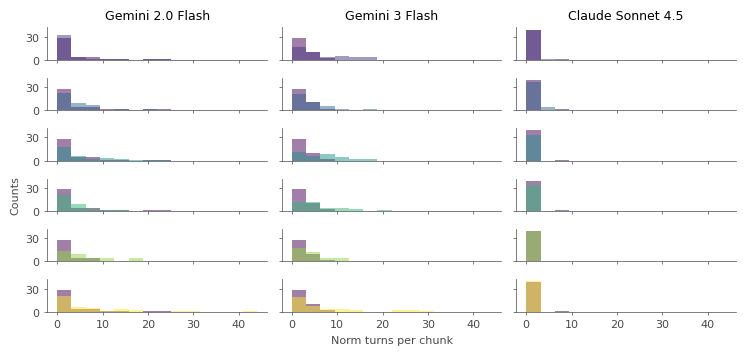

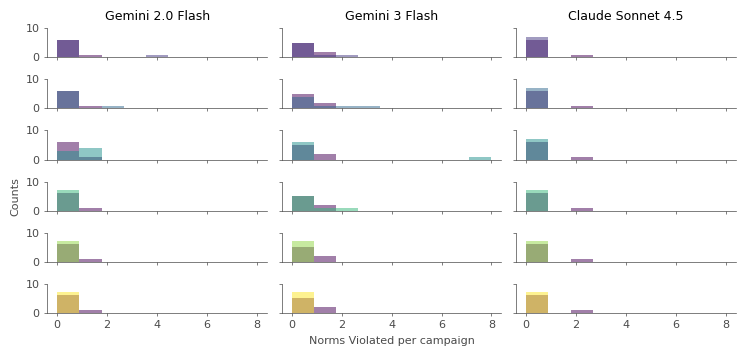

In [9]:
# === NORMS VISUALIZATION ===

fig, axes = pu.plot_model_comparison_histograms(
    norm_proportion_by_model,
    MODEL_LABELS,
    bins=15,
    xlabel='Norm turns per chunk'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_norm_turns.pdf', transparent=True)

fig, axes = pu.plot_model_comparison_histograms(
    total_violated_by_model,
    MODEL_LABELS,
    bins=10,
    xlabel='Norms Violated per campaign'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_norms_violated.pdf', transparent=True)

In [10]:
# === COLLABORATIVE CREATIVITY ANALYSIS ===

collab_creativity_results = {}
for model in MODELS:
    print(f"Running collab creativity analysis with {model}...")
    collab_creativity_results[model] = metrics.analyze_collab_creativity(dfs, model=model, force_refresh=FORCE_REFRESH)

collab_creativity_turns_by_model = {}
mean_creativity_by_model = {}
for i, model in enumerate(MODELS):
    label = MODEL_LABELS[i]
    collab_creativity_turns_by_model[label], _ = pu.aggregate_metric(
        collab_creativity_results[model], campaign_names, categories, CATEGORY_ORDER, 'collab_creativity_turns'
    )
    mean_creativity_by_model[label], _ = pu.aggregate_metric(
        collab_creativity_results[model], campaign_names, categories, CATEGORY_ORDER, 'mean_creativity'
    )

Running collab creativity analysis with gemini/gemini-2.0-flash...
Analyzing collaborative creativity in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:17<00:00,  8.90s/window]


  Rating 49 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating:  16%|█▋        | 8/49 [00:06<00:34,  1.19episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating:  18%|█▊        | 9/49 [00:17<02:40,  4.02s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 49/49 [01:13<00:00,  1.50s/episode]


  Found 49 collab creativity episode(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:02<00:00,  2.84s/window]


  Rating 8 episode(s)...


  3135-the-head-of-the-serpent rating:  25%|██▌       | 2/8 [00:01<00:04,  1.48episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  3135-the-head-of-the-serpent rating: 100%|██████████| 8/8 [00:31<00:00,  3.95s/episode]


  Found 8 collab creativity episode(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:06<00:00,  6.41s/window]


  Rating 15 episode(s)...


  10391-guardians-of-gridori rating:  20%|██        | 3/15 [00:02<00:10,  1.19episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori rating:  27%|██▋       | 4/15 [00:13<00:54,  4.94s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori rating:  33%|███▎      | 5/15 [00:24<01:11,  7.13s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori rating: 100%|██████████| 15/15 [00:42<00:00,  2.86s/episode]


  Found 15 collab creativity episode(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:06<00:00,  6.07s/window]


  Rating 20 episode(s)...


  20049-age-of-death rating:  25%|██▌       | 5/20 [00:03<00:11,  1.29episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death rating:  50%|█████     | 10/20 [00:33<00:26,  2.62s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death rating:  55%|█████▌    | 11/20 [00:44<00:47,  5.23s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death rating:  80%|████████  | 16/20 [01:13<00:13,  3.31s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death rating: 100%|██████████| 20/20 [01:41<00:00,  5.10s/episode]


  Found 20 collab creativity episode(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.06s/window]


  Rating 40 episode(s)...


  89221-banhaven-academy-year-1 rating:  52%|█████▎    | 21/40 [00:16<00:12,  1.48episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1 rating: 100%|██████████| 40/40 [00:57<00:00,  1.43s/episode]


  Found 40 collab creativity episode(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:09<00:00,  9.78s/window]


  Rating 29 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating:   3%|▎         | 1/29 [00:00<00:23,  1.19episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak rating:  38%|███▊      | 11/29 [00:19<00:16,  1.11episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak rating:  62%|██████▏   | 18/29 [00:49<00:18,  1.66s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak rating:  83%|████████▎ | 24/29 [01:20<00:10,  2.17s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 29/29 [01:34<00:00,  3.26s/episode]


  Found 29 collab creativity episode(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:02<00:00,  2.82s/window]


  Rating 6 episode(s)...


  7426-serpent-isle-private-campaign rating:  50%|█████     | 3/6 [00:02<00:02,  1.36episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign rating: 100%|██████████| 6/6 [00:31<00:00,  5.18s/episode]


  Found 6 collab creativity episode(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.25s/window]


  Rating 30 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating:  27%|██▋       | 8/30 [00:07<00:17,  1.26episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating:  37%|███▋      | 11/30 [00:36<01:31,  4.81s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating:  53%|█████▎    | 16/30 [01:06<00:48,  3.43s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 30/30 [01:43<00:00,  3.46s/episode]


  Found 30 collab creativity episode(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.83s/window]


  Rating 41 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating:  12%|█▏        | 5/41 [00:03<00:24,  1.49episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating:  29%|██▉       | 12/41 [00:35<00:52,  1.80s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating:  68%|██████▊   | 28/41 [01:15<00:11,  1.15episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 41/41 [01:51<00:00,  2.73s/episode]


  Found 41 collab creativity episode(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.94s/window]


  Rating 13 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating:  77%|███████▋  | 10/13 [00:07<00:02,  1.29episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 13/13 [00:35<00:00,  2.72s/episode]


  Found 13 collab creativity episode(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.27s/window]


  Rating 38 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating:   0%|          | 0/38 [00:00<?, ?episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating:  21%|██        | 8/38 [00:17<00:41,  1.40s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating:  32%|███▏      | 12/38 [00:48<01:42,  3.95s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 38/38 [01:19<00:00,  2.10s/episode]


  Found 38 collab creativity episode(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.88s/window]


  Rating 28 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating:   0%|          | 0/28 [00:00<?, ?episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating:  32%|███▏      | 9/28 [00:17<00:19,  1.04s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 28/28 [00:59<00:00,  2.11s/episode]


  Found 28 collab creativity episode(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.31s/window]


  Rating 27 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating:   4%|▎         | 1/27 [00:01<00:28,  1.10s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 27/27 [00:32<00:00,  1.19s/episode]


  Found 27 collab creativity episode(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.53s/window]


  Rating 20 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 20/20 [00:16<00:00,  1.19episode/s]


  Found 20 collab creativity episode(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.99s/window]


  Rating 54 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating:   9%|▉         | 5/54 [00:04<00:39,  1.23episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 54/54 [00:54<00:00,  1.01s/episode]


  Found 54 collab creativity episode(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:13<00:00,  6.82s/window]


  Rating 21 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 21/21 [00:15<00:00,  1.35episode/s]


  Found 21 collab creativity episode(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:20<00:00, 10.14s/window]


  Rating 71 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating:  21%|██        | 15/71 [00:11<00:45,  1.24episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating:  62%|██████▏   | 44/71 [00:51<00:23,  1.13episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating:  70%|███████   | 50/71 [01:09<00:36,  1.75s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating:  72%|███████▏  | 51/71 [02:02<05:39, 17.00s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating:  82%|████████▏ | 58/71 [02:19<00:34,  2.65s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 71/71 [02:43<00:00,  2.30s/episode]


  Found 71 collab creativity episode(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:20<00:00, 10.39s/window]


  Rating 43 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating:  70%|██████▉   | 30/43 [00:26<00:11,  1.17episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 43/43 [01:02<00:00,  1.45s/episode]


  Found 43 collab creativity episode(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:22<00:00, 11.11s/window]


  Rating 78 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating:  65%|██████▌   | 51/78 [00:41<00:20,  1.31episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating:  67%|██████▋   | 52/78 [00:52<01:40,  3.85s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating:  91%|█████████ | 71/78 [01:33<00:05,  1.23episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 78/78 [01:49<00:00,  1.41s/episode]


  Found 78 collab creativity episode(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.61s/window]


  Rating 16 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating:  50%|█████     | 8/16 [00:06<00:07,  1.06episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating:  94%|█████████▍| 15/16 [00:24<00:01,  1.30s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 16/16 [00:35<00:00,  2.23s/episode]


  Found 16 collab creativity episode(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.58s/window]


  Found 0 collab creativity episode(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.36s/window]


  Rating 7 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating:  43%|████▎     | 3/7 [00:02<00:02,  1.38episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 7/7 [00:16<00:00,  2.31s/episode]


  Found 7 collab creativity episode(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.71s/window]


  Rating 36 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 36/36 [00:30<00:00,  1.18episode/s]


  Found 36 collab creativity episode(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.80s/window]


  Rating 36 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating:  28%|██▊       | 10/36 [00:09<00:22,  1.18episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating:  58%|█████▊    | 21/36 [00:28<00:12,  1.19episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating:  72%|███████▏  | 26/36 [00:58<00:26,  2.64s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 36/36 [01:16<00:00,  2.12s/episode]


  Found 36 collab creativity episode(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.82s/window]


  Rating 39 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating:  23%|██▎       | 9/39 [00:06<00:23,  1.26episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating:  41%|████      | 16/39 [00:37<00:39,  1.72s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating:  51%|█████▏    | 20/39 [01:06<01:10,  3.69s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating:  67%|██████▋   | 26/39 [01:37<00:32,  2.47s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating:  95%|█████████▍| 37/39 [01:57<00:02,  1.02s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 39/39 [02:24<00:00,  3.72s/episode]


  Found 39 collab creativity episode(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.35s/window]


  Rating 31 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating:  32%|███▏      | 10/31 [00:08<00:17,  1.21episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating:  48%|████▊     | 15/31 [00:37<00:43,  2.70s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 31/31 [01:01<00:00,  1.99s/episode]


  Found 31 collab creativity episode(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:11<00:00, 11.30s/window]


  Rating 39 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating:  49%|████▊     | 19/39 [00:16<00:17,  1.11episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating:  72%|███████▏  | 28/39 [00:35<00:12,  1.10s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating:  97%|█████████▋| 38/39 [00:54<00:00,  1.05episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 39/39 [01:05<00:00,  1.69s/episode]


  Found 39 collab creativity episode(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.35s/window]


  Found 0 collab creativity episode(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.69s/window]


  Found 0 collab creativity episode(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:01<00:00,  1.23s/window]


  Found 0 collab creativity episode(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.42s/window]


  Rating 34 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating:  21%|██        | 7/34 [00:06<00:30,  1.11s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating:  38%|███▊      | 13/34 [00:36<00:44,  2.13s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating:  59%|█████▉    | 20/34 [01:08<00:25,  1.84s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating:  91%|█████████ | 31/34 [01:27<00:02,  1.12episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 34/34 [01:41<00:00,  2.98s/episode]


  Found 34 collab creativity episode(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.38s/window]


  Rating 19 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating:  53%|█████▎    | 10/19 [00:08<00:07,  1.26episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating:  79%|███████▉  | 15/19 [00:37<00:10,  2.70s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 19/19 [01:06<00:00,  3.51s/episode]


  Found 19 collab creativity episode(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.20s/window]


  Rating 18 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating:  89%|████████▉ | 16/18 [00:14<00:01,  1.07episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 18/18 [00:41<00:00,  2.33s/episode]


  Found 18 collab creativity episode(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.78s/window]


  Rating 7 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 7/7 [00:05<00:00,  1.36episode/s]


  Found 7 collab creativity episode(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.13s/window]


  Rating 4 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating:  25%|██▌       | 1/4 [00:01<00:03,  1.12s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 4/4 [00:30<00:00,  7.63s/episode]


  Found 4 collab creativity episode(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.24s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating:  20%|██        | 3/15 [00:02<00:10,  1.10episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 15/15 [00:41<00:00,  2.79s/episode]


  Found 15 collab creativity episode(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:03<00:00,  3.87s/window]


  Rating 11 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating:  82%|████████▏ | 9/11 [00:07<00:01,  1.27episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 11/11 [00:35<00:00,  3.25s/episode]


  Found 11 collab creativity episode(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.00s/window]


  Rating 28 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating:  18%|█▊        | 5/28 [00:04<00:19,  1.19episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating:  54%|█████▎    | 15/28 [00:24<00:13,  1.07s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating:  64%|██████▍   | 18/28 [00:52<00:46,  4.68s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating:  82%|████████▏ | 23/28 [01:23<00:17,  3.46s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 28/28 [01:53<00:00,  4.05s/episode]


  Found 28 collab creativity episode(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.11s/window]


  Rating 29 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating:  14%|█▍        | 4/29 [00:03<00:21,  1.16episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating:  41%|████▏     | 12/29 [00:21<00:19,  1.16s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating:  55%|█████▌    | 16/29 [00:50<00:47,  3.67s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating:  59%|█████▊    | 17/29 [01:02<01:11,  5.92s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating:  97%|█████████▋| 28/29 [01:22<00:01,  1.03s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 29/29 [01:34<00:00,  3.27s/episode]


  Found 29 collab creativity episode(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction:   0%|          | 0/1 [00:00<?, ?window/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.76s/window]


  Found 0 collab creativity episode(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.49s/window]


  Found 0 collab creativity episode(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.99s/window]


  Rating 23 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating:  39%|███▉      | 9/23 [00:07<00:11,  1.20episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating:  65%|██████▌   | 15/23 [00:37<00:17,  2.13s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 23/23 [00:55<00:00,  2.41s/episode]


  Found 23 collab creativity episode(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.91s/window]


  Rating 23 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating:  22%|██▏       | 5/23 [00:03<00:13,  1.34episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating:  35%|███▍      | 8/23 [00:32<01:14,  4.96s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating:  61%|██████    | 14/23 [01:03<00:23,  2.64s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating:  78%|███████▊  | 18/23 [01:32<00:19,  3.92s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 23/23 [01:47<00:00,  4.69s/episode]


  Found 23 collab creativity episode(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.70s/window]


  Rating 36 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating:  22%|██▏       | 8/36 [00:06<00:21,  1.32episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating:  39%|███▉      | 14/36 [00:37<00:49,  2.25s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating:  56%|█████▌    | 20/36 [01:07<00:36,  2.27s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating:  67%|██████▋   | 24/36 [01:37<00:47,  3.92s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating:  83%|████████▎ | 30/36 [02:07<00:15,  2.50s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 36/36 [02:23<00:00,  4.00s/episode]


  Found 36 collab creativity episode(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.97s/window]


  Rating 52 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating:   6%|▌         | 3/52 [00:02<00:42,  1.15episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating:  31%|███       | 16/52 [00:23<00:30,  1.18episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating:  42%|████▏     | 22/52 [00:54<01:04,  2.14s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating:  60%|█████▉    | 31/52 [01:13<00:24,  1.16s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating:  65%|██████▌   | 34/52 [01:42<01:25,  4.74s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating:  77%|███████▋  | 40/52 [02:13<00:31,  2.64s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 52/52 [02:49<00:00,  3.27s/episode]


  Found 52 collab creativity episode(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.07s/window]


  Found 0 collab creativity episode(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.75s/window]


  Rating 23 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating:  17%|█▋        | 4/23 [00:03<00:15,  1.24episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating:  43%|████▎     | 10/23 [00:35<00:28,  2.22s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating:  74%|███████▍  | 17/23 [00:54<00:10,  1.78s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 23/23 [01:15<00:00,  3.27s/episode]


  Found 23 collab creativity episode(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.22s/window]


  Rating 40 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating:  15%|█▌        | 6/40 [00:04<00:25,  1.35episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating:  25%|██▌       | 10/40 [00:34<01:55,  3.84s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating:  32%|███▎      | 13/40 [01:03<02:34,  5.71s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating:  48%|████▊     | 19/40 [01:35<01:03,  3.05s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating:  57%|█████▊    | 23/40 [02:03<01:07,  3.98s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating:  65%|██████▌   | 26/40 [02:34<01:26,  6.17s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...

Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 2/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUST

  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 40/40 [03:11<00:00,  4.78s/episode]


  Found 40 collab creativity episode(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.98s/window]


  Rating 15 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating:  53%|█████▎    | 8/15 [00:06<00:05,  1.28episode/s]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.RateLimitError: litellm.RateLimitError: geminiException - {
  "error": {
    "code": 429,
    "message": "Resource exhausted. Please try again later. Please refer to https://cloud.google.com/vertex-ai/generative-ai/docs/error-code-429 for more details.",
    "status": "RESOURCE_EXHAUSTED"
  }
}

⏳ Waiting 10 seconds before retry...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 15/15 [00:23<00:00,  1.56s/episode]


  Found 15 collab creativity episode(s) in 5 chunk(s)
💾 Saved 49 Collab creativity results to cache
Running collab creativity analysis with gemini/gemini-3-flash-preview...
Analyzing collaborative creativity in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [00:14<00:00,  7.11s/window]


  Rating 34 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 34/34 [00:37<00:00,  1.12s/episode]


  Found 34 collab creativity episode(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:06<00:00,  6.78s/window]


  Rating 15 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 15/15 [00:15<00:00,  1.06s/episode]


  Found 15 collab creativity episode(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:08<00:00,  8.03s/window]


  Rating 25 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 25/25 [00:27<00:00,  1.09s/episode]


  Found 25 collab creativity episode(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:04<00:00,  4.91s/window]


  Rating 16 episode(s)...


  20049-age-of-death rating: 100%|██████████| 16/16 [00:19<00:00,  1.20s/episode]


  Found 16 collab creativity episode(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.79s/window]


  Rating 27 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 27/27 [00:31<00:00,  1.18s/episode]


  Found 27 collab creativity episode(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:06<00:00,  6.96s/window]


  Rating 19 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 19/19 [00:22<00:00,  1.20s/episode]


  Found 19 collab creativity episode(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:02<00:00,  2.89s/window]


  Rating 7 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 7/7 [00:07<00:00,  1.07s/episode]


  Found 7 collab creativity episode(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.96s/window]


  Rating 24 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 24/24 [00:31<00:00,  1.31s/episode]


  Found 24 collab creativity episode(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.20s/window]


  Rating 24 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 24/24 [00:27<00:00,  1.15s/episode]


  Found 24 collab creativity episode(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.81s/window]


  Rating 16 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 16/16 [00:18<00:00,  1.15s/episode]


  Found 16 collab creativity episode(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.68s/window]


  Rating 21 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 21/21 [00:24<00:00,  1.17s/episode]


  Found 21 collab creativity episode(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.96s/window]


  Rating 30 episode(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 rating: 100%|██████████| 30/30 [00:36<00:00,  1.21s/episode]


  Found 30 collab creativity episode(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.28s/window]


  Rating 18 episode(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 rating: 100%|██████████| 18/18 [00:21<00:00,  1.22s/episode]


  Found 18 collab creativity episode(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.59s/window]


  Rating 36 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 36/36 [00:42<00:00,  1.18s/episode]


  Found 36 collab creativity episode(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:14<00:00, 14.62s/window]


  Rating 36 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 rating: 100%|██████████| 36/36 [00:42<00:00,  1.17s/episode]


  Found 36 collab creativity episode(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [00:12<00:00,  6.25s/window]


  Rating 26 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 26/26 [00:29<00:00,  1.13s/episode]


  Found 26 collab creativity episode(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:18<00:00,  9.01s/window]


  Rating 52 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 52/52 [01:00<00:00,  1.16s/episode]


  Found 52 collab creativity episode(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:27<00:00, 13.79s/window]


  Rating 85 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 rating: 100%|██████████| 85/85 [01:38<00:00,  1.16s/episode]


  Found 85 collab creativity episode(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:29<00:00, 14.65s/window]


  Rating 76 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 76/76 [01:27<00:00,  1.15s/episode]


  Found 76 collab creativity episode(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:13<00:00, 14.00s/window]


  Rating 38 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 38/38 [00:44<00:00,  1.17s/episode]


  Found 38 collab creativity episode(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.32s/window]


  Rating 22 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 22/22 [00:26<00:00,  1.20s/episode]


  Found 22 collab creativity episode(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.16s/window]


  Rating 16 episode(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 rating: 100%|██████████| 16/16 [00:17<00:00,  1.11s/episode]


  Found 16 collab creativity episode(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.89s/window]


  Rating 23 episode(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 rating: 100%|██████████| 23/23 [00:26<00:00,  1.15s/episode]


  Found 23 collab creativity episode(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.76s/window]


  Rating 32 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 32/32 [00:36<00:00,  1.16s/episode]


  Found 32 collab creativity episode(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.92s/window]


  Rating 37 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 37/37 [00:45<00:00,  1.22s/episode]


  Found 37 collab creativity episode(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.90s/window]


  Rating 40 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 40/40 [00:45<00:00,  1.15s/episode]


  Found 40 collab creativity episode(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:13<00:00, 13.11s/window]


  Rating 38 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 38/38 [00:44<00:00,  1.17s/episode]


  Found 38 collab creativity episode(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.31s/window]


  Rating 25 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 rating: 100%|██████████| 25/25 [00:28<00:00,  1.15s/episode]


  Found 25 collab creativity episode(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:08<00:00,  8.54s/window]


  Rating 24 episode(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 rating: 100%|██████████| 24/24 [00:25<00:00,  1.08s/episode]


  Found 24 collab creativity episode(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.48s/window]


  Rating 19 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating:  58%|█████▊    | 11/19 [00:13<00:09,  1.14s/episode]


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.

⚠️  API error (attempt 1/3): litellm.ServiceUnavailableError: GeminiException - {
  "error": {
    "code": 503,
    "message": "The service is currently unavailable.",
    "status": "UNAVAILABLE"
  }
}

⏳ Waiting 10 seconds before retry...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 rating: 100%|██████████| 19/19 [00:36<00:00,  1.92s/episode]


  Found 19 collab creativity episode(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.70s/window]


  Rating 19 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 19/19 [00:21<00:00,  1.12s/episode]


  Found 19 collab creativity episode(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.44s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 15/15 [00:17<00:00,  1.20s/episode]


  Found 15 collab creativity episode(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.85s/window]


  Rating 14 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 14/14 [00:17<00:00,  1.22s/episode]


  Found 14 collab creativity episode(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.10s/window]


  Rating 10 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 10/10 [00:10<00:00,  1.09s/episode]


  Found 10 collab creativity episode(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.40s/window]


  Rating 10 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 rating: 100%|██████████| 10/10 [00:11<00:00,  1.20s/episode]


  Found 10 collab creativity episode(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:04<00:00,  4.41s/window]


  Rating 10 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 rating: 100%|██████████| 10/10 [00:11<00:00,  1.18s/episode]


  Found 10 collab creativity episode(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.19s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 15/15 [00:17<00:00,  1.17s/episode]


  Found 15 collab creativity episode(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.77s/window]


  Rating 27 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 27/27 [00:32<00:00,  1.20s/episode]


  Found 27 collab creativity episode(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.49s/window]


  Rating 35 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 35/35 [00:40<00:00,  1.16s/episode]


  Found 35 collab creativity episode(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:05<00:00,  5.20s/window]


  Rating 8 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 8/8 [00:09<00:00,  1.15s/episode]


  Found 8 collab creativity episode(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.59s/window]


  Rating 22 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 22/22 [00:26<00:00,  1.22s/episode]


  Found 22 collab creativity episode(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.41s/window]


  Rating 40 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 rating: 100%|██████████| 40/40 [00:46<00:00,  1.17s/episode]


  Found 40 collab creativity episode(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.57s/window]


  Rating 25 episode(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 rating: 100%|██████████| 25/25 [00:28<00:00,  1.14s/episode]


  Found 25 collab creativity episode(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.70s/window]


  Rating 42 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 42/42 [00:50<00:00,  1.21s/episode]


  Found 42 collab creativity episode(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.85s/window]


  Rating 43 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 43/43 [00:50<00:00,  1.18s/episode]


  Found 43 collab creativity episode(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:06<00:00,  6.84s/window]


  Rating 19 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 19/19 [00:21<00:00,  1.11s/episode]


  Found 19 collab creativity episode(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:07<00:00,  7.97s/window]


  Rating 19 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 19/19 [00:20<00:00,  1.10s/episode]


  Found 19 collab creativity episode(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.06s/window]


  Rating 16 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 rating: 100%|██████████| 16/16 [00:18<00:00,  1.15s/episode]


  Found 16 collab creativity episode(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.92s/window]


  Rating 26 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 rating: 100%|██████████| 26/26 [00:30<00:00,  1.17s/episode]


  Found 26 collab creativity episode(s) in 5 chunk(s)
💾 Saved 49 Collab creativity results to cache
Running collab creativity analysis with claude-sonnet-4-5...
Analyzing collaborative creativity in 49 campaign(s)...
Campaign 1/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg extraction: 100%|██████████| 2/2 [01:00<00:00, 30.26s/window]


  Rating 15 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg rating: 100%|██████████| 15/15 [00:43<00:00,  2.88s/episode]


  Found 15 collab creativity episode(s) in 11 chunk(s)
Campaign 2/49: 3135-the-head-of-the-serpent (300 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent extraction: 100%|██████████| 1/1 [00:16<00:00, 16.03s/window]


  Rating 12 episode(s)...


  3135-the-head-of-the-serpent rating: 100%|██████████| 12/12 [00:32<00:00,  2.73s/episode]


  Found 12 collab creativity episode(s) in 6 chunk(s)
Campaign 3/49: 10391-guardians-of-gridori (216 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori extraction: 100%|██████████| 1/1 [00:18<00:00, 18.95s/window]


  Rating 10 episode(s)...


  10391-guardians-of-gridori rating: 100%|██████████| 10/10 [00:31<00:00,  3.17s/episode]


  Found 10 collab creativity episode(s) in 5 chunk(s)
Campaign 4/49: 20049-age-of-death (186 turns)
  Extracting from 1 window(s)...


  20049-age-of-death extraction: 100%|██████████| 1/1 [00:14<00:00, 14.70s/window]


  Rating 10 episode(s)...


  20049-age-of-death rating: 100%|██████████| 10/10 [00:28<00:00,  2.85s/episode]


  Found 10 collab creativity episode(s) in 4 chunk(s)
Campaign 5/49: 89221-banhaven-academy-year-1 (317 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1 extraction: 100%|██████████| 1/1 [00:24<00:00, 24.78s/window]


  Rating 14 episode(s)...


  89221-banhaven-academy-year-1 rating: 100%|██████████| 14/14 [00:42<00:00,  3.05s/episode]


  Found 14 collab creativity episode(s) in 7 chunk(s)
Campaign 6/49: 90630-firecat5s-dragon-of-icespire-peak (230 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak extraction: 100%|██████████| 1/1 [00:24<00:00, 24.52s/window]


  Rating 13 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak rating: 100%|██████████| 13/13 [00:35<00:00,  2.74s/episode]


  Found 13 collab creativity episode(s) in 5 chunk(s)
Campaign 7/49: 7426-serpent-isle-private-campaign (70 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign extraction: 100%|██████████| 1/1 [00:14<00:00, 14.95s/window]


  Rating 10 episode(s)...


  7426-serpent-isle-private-campaign rating: 100%|██████████| 10/10 [00:24<00:00,  2.45s/episode]


  Found 10 collab creativity episode(s) in 2 chunk(s)
Campaign 8/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 extraction: 100%|██████████| 1/1 [00:25<00:00, 25.30s/window]


  Rating 19 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_no_players_scratch_20250815_090708 rating: 100%|██████████| 19/19 [01:00<00:00,  3.17s/episode]


  Found 19 collab creativity episode(s) in 5 chunk(s)
Campaign 9/49: 10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 (202 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 extraction: 100%|██████████| 1/1 [00:17<00:00, 17.72s/window]


  Rating 2 episode(s)...


  10391-guardians-of-gridori_claude-3-7-sonnet-latest_players_scratch_20250814_143138 rating: 100%|██████████| 2/2 [00:06<00:00,  3.22s/episode]


  Found 2 collab creativity episode(s) in 5 chunk(s)
Campaign 10/49: 10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 extraction: 100%|██████████| 1/1 [00:21<00:00, 21.66s/window]


  Rating 24 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_no_players_scratch_20250817_183449 rating: 100%|██████████| 24/24 [00:59<00:00,  2.48s/episode]


  Found 24 collab creativity episode(s) in 5 chunk(s)
Campaign 11/49: 10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 extraction: 100%|██████████| 1/1 [00:17<00:00, 17.81s/window]


  Rating 15 episode(s)...


  10391-guardians-of-gridori_gemini-1.5-pro_players_scratch_20250817_181454 rating: 100%|██████████| 15/15 [00:38<00:00,  2.58s/episode]


  Found 15 collab creativity episode(s) in 5 chunk(s)
Campaign 12/49: 10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_no_players_scratch_20250814_131744 extraction: 100%|██████████| 1/1 [00:35<00:00, 35.38s/window]


  Found 0 collab creativity episode(s) in 5 chunk(s)
Campaign 13/49: 10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 (214 turns)
  Extracting from 1 window(s)...


  10391-guardians-of-gridori_gpt-4o_players_scratch_20250814_122435 extraction: 100%|██████████| 1/1 [00:09<00:00,  9.25s/window]


  Found 0 collab creativity episode(s) in 5 chunk(s)
Campaign 14/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 (283 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 extraction: 100%|██████████| 1/1 [00:31<00:00, 31.84s/window]


  Rating 27 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_no_players_scratch_20250819_110000 rating: 100%|██████████| 27/27 [01:21<00:00,  3.03s/episode]


  Found 27 collab creativity episode(s) in 6 chunk(s)
Campaign 15/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 (245 turns)
  Extracting from 1 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_claude-3-7-sonnet-latest_players_scratch_20250819_132210 extraction: 100%|██████████| 1/1 [00:44<00:00, 44.19s/window]


  Found 0 collab creativity episode(s) in 5 chunk(s)
Campaign 16/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 extraction: 100%|██████████| 2/2 [01:06<00:00, 33.26s/window]


  Rating 43 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_no_players_scratch_20250818_204449 rating: 100%|██████████| 43/43 [01:57<00:00,  2.73s/episode]


  Found 43 collab creativity episode(s) in 11 chunk(s)
Campaign 17/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 extraction: 100%|██████████| 2/2 [00:52<00:00, 26.25s/window]


  Rating 12 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gemini-1.5-pro_players_scratch_20250818_145631 rating: 100%|██████████| 12/12 [00:33<00:00,  2.78s/episode]


  Found 12 collab creativity episode(s) in 11 chunk(s)
Campaign 18/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_no_players_scratch_20250816_110159 extraction: 100%|██████████| 2/2 [00:18<00:00,  9.36s/window]


  Found 0 collab creativity episode(s) in 11 chunk(s)
Campaign 19/49: 1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 (502 turns)
  Extracting from 2 window(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 extraction: 100%|██████████| 2/2 [00:47<00:00, 23.96s/window]


  Rating 57 episode(s)...


  1262-firedeath-must-die-closed-play-by-post-open-ogg_gpt-4o_players_scratch_20250816_125646 rating: 100%|██████████| 57/57 [02:37<00:00,  2.76s/episode]


  Found 57 collab creativity episode(s) in 11 chunk(s)
Campaign 20/49: 20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.85s/window]


  Rating 22 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_no_players_scratch_20250818_133738 rating: 100%|██████████| 22/22 [01:02<00:00,  2.84s/episode]


  Found 22 collab creativity episode(s) in 4 chunk(s)
Campaign 21/49: 20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 extraction: 100%|██████████| 1/1 [00:19<00:00, 19.75s/window]


  Rating 4 episode(s)...


  20049-age-of-death_claude-3-7-sonnet-latest_players_scratch_20250818_120952 rating: 100%|██████████| 4/4 [00:10<00:00,  2.64s/episode]


  Found 4 collab creativity episode(s) in 4 chunk(s)
Campaign 22/49: 20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_no_players_scratch_20250818_130018 extraction: 100%|██████████| 1/1 [00:18<00:00, 18.29s/window]


  Found 0 collab creativity episode(s) in 4 chunk(s)
Campaign 23/49: 20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gemini-1.5-pro_players_scratch_20250818_122503 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.73s/window]


  Found 0 collab creativity episode(s) in 4 chunk(s)
Campaign 24/49: 20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.58s/window]


  Rating 23 episode(s)...


  20049-age-of-death_gpt-4o_no_players_scratch_20250816_213933 rating: 100%|██████████| 23/23 [01:04<00:00,  2.81s/episode]


  Found 23 collab creativity episode(s) in 4 chunk(s)
Campaign 25/49: 20049-age-of-death_gpt-4o_players_scratch_20250816_212424 (183 turns)
  Extracting from 1 window(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 extraction: 100%|██████████| 1/1 [00:30<00:00, 30.67s/window]


  Rating 25 episode(s)...


  20049-age-of-death_gpt-4o_players_scratch_20250816_212424 rating: 100%|██████████| 25/25 [01:12<00:00,  2.89s/episode]


  Found 25 collab creativity episode(s) in 4 chunk(s)
Campaign 26/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 (263 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 extraction: 100%|██████████| 1/1 [00:25<00:00, 25.66s/window]


  Rating 24 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_no_players_scratch_20250819_153636 rating: 100%|██████████| 24/24 [01:10<00:00,  2.93s/episode]


  Found 24 collab creativity episode(s) in 6 chunk(s)
Campaign 27/49: 3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 extraction: 100%|██████████| 1/1 [00:54<00:00, 54.04s/window]


  Rating 46 episode(s)...


  3135-the-head-of-the-serpent_claude-3-7-sonnet-latest_players_scratch_20250818_154911 rating: 100%|██████████| 46/46 [02:23<00:00,  3.12s/episode]


  Found 46 collab creativity episode(s) in 6 chunk(s)
Campaign 28/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_no_players_scratch_20250818_160148 extraction: 100%|██████████| 1/1 [00:23<00:00, 23.34s/window]


  Found 0 collab creativity episode(s) in 6 chunk(s)
Campaign 29/49: 3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gemini-1.5-pro_players_scratch_20250818_153052 extraction: 100%|██████████| 1/1 [00:25<00:00, 25.30s/window]


  Found 0 collab creativity episode(s) in 6 chunk(s)
Campaign 30/49: 3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_no_players_scratch_20250816_190300 extraction: 100%|██████████| 1/1 [00:02<00:00,  2.36s/window]


  Found 0 collab creativity episode(s) in 6 chunk(s)
Campaign 31/49: 3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 (299 turns)
  Extracting from 1 window(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 extraction: 100%|██████████| 1/1 [00:25<00:00, 25.66s/window]


  Rating 17 episode(s)...


  3135-the-head-of-the-serpent_gpt-4o_players_scratch_20250816_194054 rating: 100%|██████████| 17/17 [00:53<00:00,  3.13s/episode]


  Found 17 collab creativity episode(s) in 6 chunk(s)
Campaign 32/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 extraction: 100%|██████████| 1/1 [00:18<00:00, 18.02s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_no_players_scratch_20250818_141059 rating: 100%|██████████| 15/15 [00:43<00:00,  2.91s/episode]


  Found 15 collab creativity episode(s) in 2 chunk(s)
Campaign 33/49: 7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.66s/window]


  Rating 15 episode(s)...


  7426-serpent-isle-private-campaign_claude-3-7-sonnet-latest_players_scratch_20250818_143900 rating: 100%|██████████| 15/15 [00:41<00:00,  2.75s/episode]


  Found 15 collab creativity episode(s) in 2 chunk(s)
Campaign 34/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.54s/window]


  Rating 7 episode(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_no_players_scratch_20250818_132838 rating: 100%|██████████| 7/7 [00:20<00:00,  2.87s/episode]


  Found 7 collab creativity episode(s) in 2 chunk(s)
Campaign 35/49: 7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gemini-1.5-pro_players_scratch_20250818_133539 extraction: 100%|██████████| 1/1 [00:12<00:00, 12.14s/window]


  Found 0 collab creativity episode(s) in 2 chunk(s)
Campaign 36/49: 7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_no_players_scratch_20250817_100448 extraction: 100%|██████████| 1/1 [00:16<00:00, 16.16s/window]


  Found 0 collab creativity episode(s) in 2 chunk(s)
Campaign 37/49: 7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 (69 turns)
  Extracting from 1 window(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.23s/window]


  Rating 13 episode(s)...


  7426-serpent-isle-private-campaign_gpt-4o_players_scratch_20250817_101144 rating: 100%|██████████| 13/13 [00:37<00:00,  2.90s/episode]


  Found 13 collab creativity episode(s) in 2 chunk(s)
Campaign 38/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 (224 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 extraction: 100%|██████████| 1/1 [00:34<00:00, 34.69s/window]


  Rating 26 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_no_players_scratch_20250818_192211 rating: 100%|██████████| 26/26 [01:16<00:00,  2.95s/episode]


  Found 26 collab creativity episode(s) in 5 chunk(s)
Campaign 39/49: 89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 extraction: 100%|██████████| 1/1 [00:51<00:00, 51.42s/window]


  Rating 24 episode(s)...


  89221-banhaven-academy-year-1_claude-3-7-sonnet-latest_players_scratch_20250819_205318 rating: 100%|██████████| 24/24 [01:16<00:00,  3.17s/episode]


  Found 24 collab creativity episode(s) in 7 chunk(s)
Campaign 40/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 extraction: 100%|██████████| 1/1 [00:15<00:00, 15.64s/window]


  Rating 11 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_no_players_scratch_20250818_163025 rating: 100%|██████████| 11/11 [00:31<00:00,  2.84s/episode]


  Found 11 collab creativity episode(s) in 7 chunk(s)
Campaign 41/49: 89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 extraction: 100%|██████████| 1/1 [00:22<00:00, 22.45s/window]


  Rating 26 episode(s)...


  89221-banhaven-academy-year-1_gemini-1.5-pro_players_scratch_20250818_190918 rating: 100%|██████████| 26/26 [01:07<00:00,  2.61s/episode]


  Found 26 collab creativity episode(s) in 7 chunk(s)
Campaign 42/49: 89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_no_players_scratch_20250816_183355 extraction: 100%|██████████| 1/1 [00:46<00:00, 46.89s/window]


  Found 0 collab creativity episode(s) in 7 chunk(s)
Campaign 43/49: 89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 (316 turns)
  Extracting from 1 window(s)...


  89221-banhaven-academy-year-1_gpt-4o_players_scratch_20250816_140525 extraction: 100%|██████████| 1/1 [00:29<00:00, 29.03s/window]


  Found 0 collab creativity episode(s) in 7 chunk(s)
Campaign 44/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 (213 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 extraction: 100%|██████████| 1/1 [00:51<00:00, 51.66s/window]


  Rating 41 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_no_players_scratch_20250815_234149 rating: 100%|██████████| 41/41 [02:08<00:00,  3.14s/episode]


  Found 41 collab creativity episode(s) in 5 chunk(s)
Campaign 45/49: 90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 (204 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 extraction: 100%|██████████| 1/1 [00:21<00:00, 21.20s/window]


  Rating 9 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_claude-3-7-sonnet-latest_players_scratch_20250815_204211 rating: 100%|██████████| 9/9 [00:27<00:00,  3.04s/episode]


  Found 9 collab creativity episode(s) in 5 chunk(s)
Campaign 46/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 extraction: 100%|██████████| 1/1 [00:20<00:00, 20.37s/window]


  Rating 17 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_no_players_scratch_20250818_095237 rating: 100%|██████████| 17/17 [00:49<00:00,  2.91s/episode]


  Found 17 collab creativity episode(s) in 5 chunk(s)
Campaign 47/49: 90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 extraction: 100%|██████████| 1/1 [00:18<00:00, 18.63s/window]


  Rating 12 episode(s)...


  90630-firecat5s-dragon-of-icespire-peak_gemini-1.5-pro_players_scratch_20250818_103347 rating: 100%|██████████| 12/12 [00:36<00:00,  3.01s/episode]


  Found 12 collab creativity episode(s) in 5 chunk(s)
Campaign 48/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_no_players_scratch_20250815_101602 extraction: 100%|██████████| 1/1 [00:10<00:00, 10.52s/window]


  Found 0 collab creativity episode(s) in 5 chunk(s)
Campaign 49/49: 90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 (229 turns)
  Extracting from 1 window(s)...


  90630-firecat5s-dragon-of-icespire-peak_gpt-4o_players_scratch_20250814_153319 extraction: 100%|██████████| 1/1 [00:27<00:00, 27.32s/window]

  Found 0 collab creativity episode(s) in 5 chunk(s)
💾 Saved 49 Collab creativity results to cache


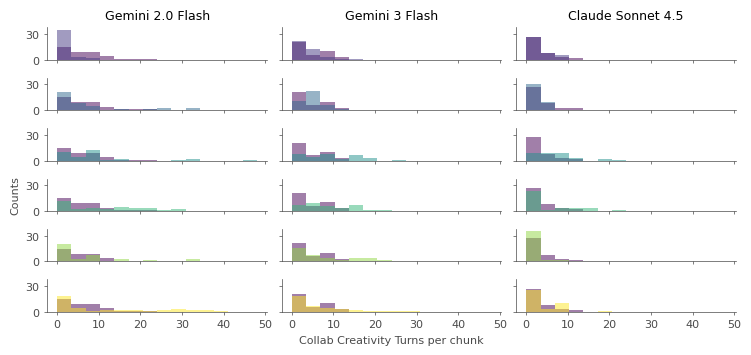

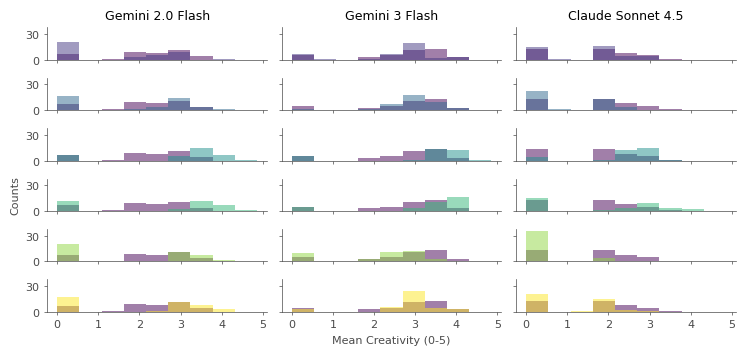

In [14]:
# === COLLABORATIVE CREATIVITY VISUALIZATION ===

fig, axes = pu.plot_model_comparison_histograms(
    collab_creativity_turns_by_model,
    MODEL_LABELS,
    bins=15,
    xlabel='Collab Creativity Turns per chunk'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_collab_creativity_turns.pdf', transparent=True)

fig, axes = pu.plot_model_comparison_histograms(
    mean_creativity_by_model,
    MODEL_LABELS,
    bins=10,
    xlabel='Mean Creativity (0-5)'
)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_comparison_collab_creativity.pdf', transparent=True)

In [12]:
# === LONG EPISODE INSPECTOR ===
# Find episodes that seem unrealistically long (potential LLM hallucinations)

from ast import Mod


MAX_REASONABLE_LENGTH = 4  # Episodes longer than this are suspicious

def inspect_long_episodes(results_by_model, model_labels, max_length=MAX_REASONABLE_LENGTH):
    """Find and display episodes longer than max_length turns."""
    for model_key, label in zip(MODELS, model_labels):
        print(f"\n{'='*60}")
        print(f"MODEL: {label}")
        print('='*60)

        results = results_by_model[model_key]
        long_count = 0

        for campaign_id, result in results.items():
            episodes = result.metadata.get('episodes', [])
            long_eps = [ep for ep in episodes if ep['turn_count'] > max_length]

            if long_eps:
                for ep in long_eps:
                    long_count += 1
                    print(f"\n--- {campaign_id} ---")
                    print(f"Turns {ep['start_turn']}-{ep['end_turn']} ({ep['turn_count']} turns)")
                    print(f"Description: {ep['description']}")
                    if 'originality' in ep:
                        print(f"Originality: {ep['originality']}")
                    elif 'intensity' in ep:
                        print(f"Intensity: {ep['intensity']}")
                    elif 'creativity' in ep:
                        print(f"Creativity: {ep['creativity']}")
                    print(f"\nEpisode text:")
                    print(ep.get('episode_text', '[not stored]')[:50000])

        print(f"\nTotal long episodes (>{max_length} turns): {long_count}")

# Run for humor
print(MODEL_LABELS)
inspect_long_episodes(collab_creativity_results, ['Claude Sonnet 4.5'])

['Gemini 2.0 Flash', 'Gemini 3 Flash', 'Claude Sonnet 4.5']

MODEL: Claude Sonnet 4.5

--- 1262-firedeath-must-die-closed-play-by-post-open-ogg ---
Turns 126-130 (5 turns)
Description: Argo expresses disagreement and provides an alternative suggestion, sparking a collaborative discussion about the party's next move.
Creativity: 3

Episode text:
Turn 126 - Argo: A look of confusion comes across Argo's (totally normal human) face.  "A tavern? Even when we tried to meet in secret, the Dragon's forces found us. Do you think they will simply forget about us because we killed the first batch? We are marked men. We need to get out of the city, where we can spot an ambush coming and be on our guard. And nothing in that tavern will be as fresh as what we can find in the wild. Why would some drunk city-dweller in a tavern know anything about a Well of Dreams? Especially one in a tavern at this hour." (OOG: Changing text color to be less like Dro's. Also, I am very excited about the rules links s

In [13]:
# === CROSS-MODEL EPISODE COMPARISON ===
# Compare episodes identified by different models for the same campaign

def compare_episodes_across_models(results_by_model, model_labels, campaign_id, turn_range=None):
    """
    Compare episodes across models for a specific campaign.

    Args:
        results_by_model: Dict mapping model key to results dict
        model_labels: List of display labels
        campaign_id: Campaign to compare
        turn_range: Optional (start, end) tuple to filter episodes
    """
    print(f"Campaign: {campaign_id}")
    if turn_range:
        print(f"Turn range: {turn_range[0]}-{turn_range[1]}")
    print()

    for model_key, label in zip(MODELS, model_labels):
        print(f"\n{'='*50}")
        print(f"MODEL: {label}")
        print('='*50)

        if campaign_id not in results_by_model[model_key]:
            print("  (campaign not found)")
            continue

        result = results_by_model[model_key][campaign_id]
        episodes = result.metadata.get('episodes', [])

        # Filter by turn range if specified
        if turn_range:
            episodes = [ep for ep in episodes
                       if ep['end_turn'] >= turn_range[0] and ep['start_turn'] <= turn_range[1]]

        if not episodes:
            print("  (no episodes found)")
            continue

        for ep in sorted(episodes, key=lambda x: x['start_turn']):
            rating_key = next((k for k in ['originality', 'intensity', 'depth', 'creativity'] if k in ep), None)
            rating = ep.get(rating_key, '?') if rating_key else '?'
            print(f"  Turns {ep['start_turn']:3d}-{ep['end_turn']:3d} ({ep['turn_count']:2d}t) "
                  f"| {rating_key}={rating} | {ep['description'][:60]}")

# Example: Compare humor episodes for a specific campaign
sample_campaign = list(humor_results[MODELS[0]].keys())[0]
compare_episodes_across_models(humor_results, MODEL_LABELS, sample_campaign)

Campaign: 1262-firedeath-must-die-closed-play-by-post-open-ogg


MODEL: Gemini 2.0 Flash
  Turns   3-  3 ( 1t) | originality=1 | ** Dro Coborel's self-deprecating comment about his characte
  Turns  11- 11 ( 1t) | originality=1 | ** Dro Coborel's comment "I like this guy!! HAHA!" shows app
  Turns  23- 23 ( 1t) | originality=3 | ** Dungeon Master's self-deprecating humor about being new t
  Turns  36- 36 ( 1t) | originality=1 | ** Alendi's comment about rolling two 18s is funny because o
  Turns  57- 57 ( 1t) | originality=2 | ** Alendi's sarcastic quip "Hey, guys. I found the rest of t
  Turns  60- 60 ( 1t) | originality=4 | ** Dro Coborel's OOC comment about his car being broken is h
  Turns  77- 78 ( 2t) | originality=2 | ** Dungeon Master's self-deprecating comment about rolling p
  Turns  91- 91 ( 1t) | originality=2 | ** Dungeon Master's reference to watching Crashing on HBO is
  Turns  94- 94 ( 1t) | originality=2 | ** Dro Coborel's OOC comment about potentially dying is humo
  

KeyError: 'claude-sonnet-4-5'

In [ ]:
# === CHUNK METRICS COMPARISON ===
# Compare chunk-level metrics across models

def compare_chunk_metrics(results_by_model, model_labels, campaign_id, metric_series='humor_turns'):
    """
    Compare chunk-level metrics across models.

    Args:
        results_by_model: Dict mapping model key to results dict
        model_labels: List of display labels
        campaign_id: Campaign to compare
        metric_series: Name of series to compare
    """
    print(f"Campaign: {campaign_id}")
    print(f"Metric: {metric_series}")
    print()

    # Get max chunks across models
    max_chunks = 0
    for model_key in MODELS:
        if campaign_id in results_by_model[model_key]:
            n = len(results_by_model[model_key][campaign_id].series.get(metric_series, []))
            max_chunks = max(max_chunks, n)

    # Header
    header = f"{'Chunk':>6}"
    for label in model_labels:
        header += f" | {label:>15}"
    print(header)
    print("-" * len(header))

    # Data rows
    for i in range(max_chunks):
        row = f"{i:>6}"
        for model_key in MODELS:
            if campaign_id in results_by_model[model_key]:
                series = results_by_model[model_key][campaign_id].series.get(metric_series, [])
                if i < len(series):
                    row += f" | {series[i]:>15.1f}"
                else:
                    row += f" | {'':>15}"
            else:
                row += f" | {'N/A':>15}"
        print(row)

# Example usage
sample_campaign = list(humor_results[MODELS[0]].keys())[0]
compare_chunk_metrics(humor_results, MODEL_LABELS, sample_campaign, 'humor_turns')

Campaign: 1262-firedeath-must-die-closed-play-by-post-open-ogg
Metric: humor_turns

 Chunk | Gemini 2.0 Flash |  Gemini 3 Flash | Claude Sonnet 4.5
---------------------------------------------------------------
     0 |             3.0 |             3.0 |             3.0
     1 |             4.0 |            12.0 |             3.0
     2 |             5.0 |            13.0 |             4.0
     3 |             4.0 |             6.0 |             0.0
     4 |             4.0 |             8.0 |             0.0
     5 |             9.0 |             3.0 |             1.0
     6 |            11.0 |             8.0 |             5.0
     7 |             3.0 |             1.0 |             1.0
     8 |            14.0 |             9.0 |             3.0
     9 |            21.0 |            15.0 |            12.0
    10 |             0.0 |             1.0 |             1.0
